# GUC Clustering Project 

# Hanya Ashraf 46-0347

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [4]:
# if plotnine is not installed in Jupter then use the following command to install it 


In [5]:
#!pip install plotnine

Running this project require the following imports 

In [301]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
import scipy.cluster.hierarchy as shc
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [7]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



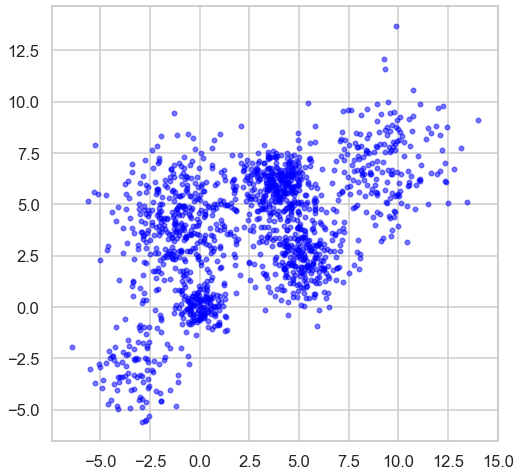

In [333]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [334]:
forGMM=y
forGMM

array([0, 0, 0, ..., 5, 5, 5])

# ----------------------------------------------------------------------------------------------------------------

I'll start by examining the data

In [335]:
Multi_blob_Data 

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

In [336]:
Multi_blob_Data.size 

2900

converting the array to a dataframe

In [337]:
df = pd.DataFrame(Multi_blob_Data, columns = ['x','y']) 

In [338]:
df

x          y
0     -2.354272  -3.179744
1     -2.158005  -1.020061
2     -3.304399  -3.304378
3     -0.947023  -2.002335
4     -3.610317  -2.294672
...         ...        ...
1445   9.240137   3.378037
1446  10.305952   7.366174
1447   9.864057  13.674604
1448   5.457008   9.931984
1449   8.511339   7.488459

[1450 rows x 2 columns]

Check if dataset needs normalization, and the distribution of each feature

In [339]:
df.describe()

x            y
count  1450.000000  1450.000000
mean      2.654231     3.675628
std       3.953782     3.048856
min      -6.405669    -5.583840
25%      -0.603349     1.752051
50%       3.204199     4.036196
75%       5.128255     5.978841
max      14.013461    13.674604

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

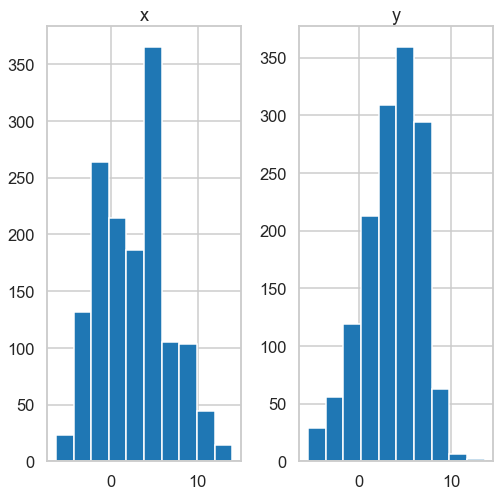

In [340]:
df.hist()

Conclusion: the distribution of the 2 features seems normal and the 2 distributions are not significantly different, so no need to normalize

# ----------------------------------------------------------------------------------------------------------------

# Kmeans


* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

# ----------------------------------------------------------------------------------------------------------------

Will start by defining the different number of clusters =2,3,4,5,6,7,8
and initializing array for distortion function and silhouette values

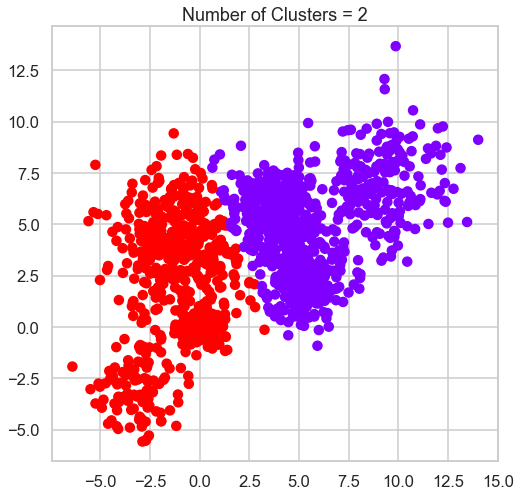

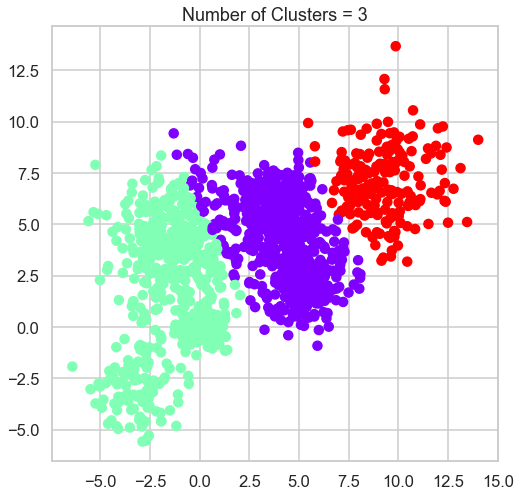

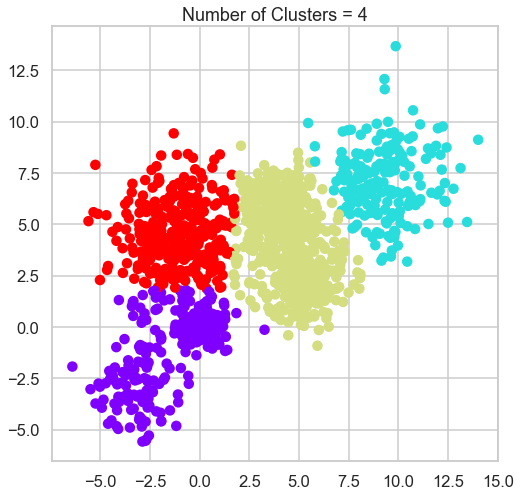

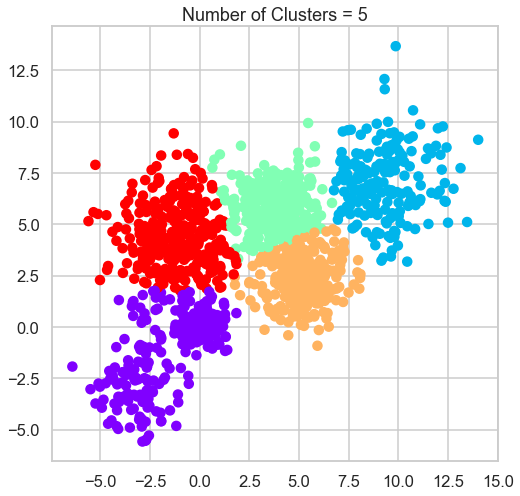

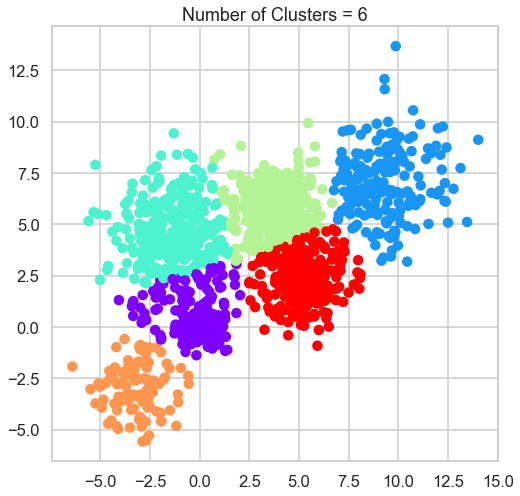

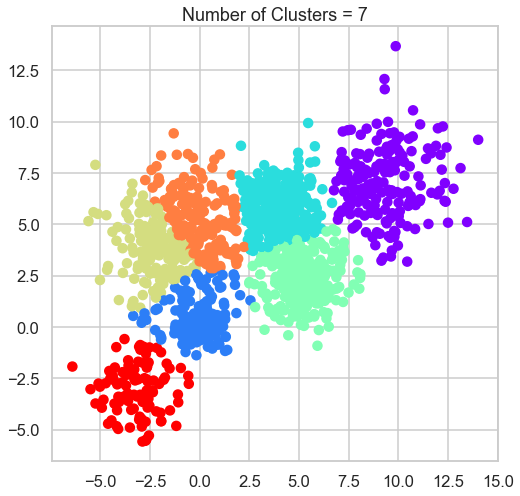

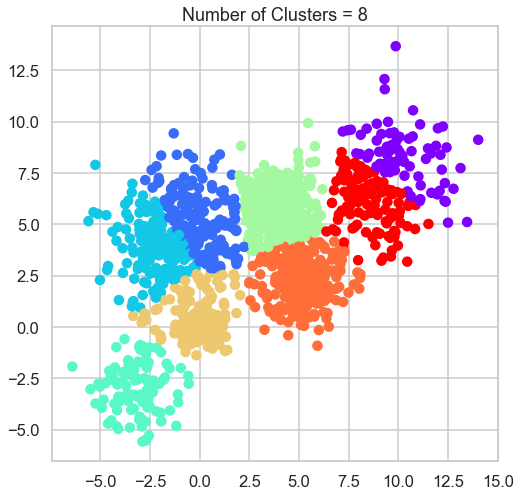

In [341]:
ClusterNumbers = range(2, 9) 
DistortionFunction = []
Silhouette_score = []
for k in ClusterNumbers:
    
    # model fitting
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df)
    
    #clustering plot
    clusters=kmeans.fit_predict(df)
    plt.figure()
    plt.scatter(df['x'],df['y'],c=clusters,cmap='rainbow') 
    plt.title("Number of Clusters = {}".format(k))
    
    
    #distortion function
    distortion = kmeans.inertia_
    DistortionFunction.append(distortion)
    
    #silhouette score
    labels = kmeans.labels_
    silhouette = silhouette_score(df, labels)
    Silhouette_score.append(silhouette)

# plotting the 2 graphs: distortion function and silhouette score

Text(0.5, 1.0, 'Distortions of K-Means')

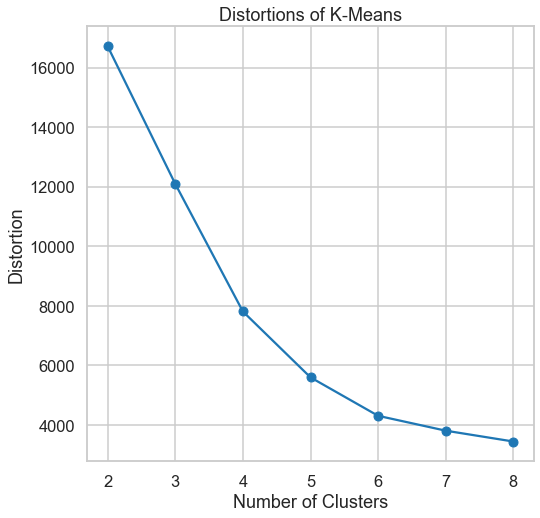

In [38]:
plt.plot(ClusterNumbers, DistortionFunction, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Distortions of K-Means')

Text(0.5, 1.0, 'K-Means Silhouette Score')

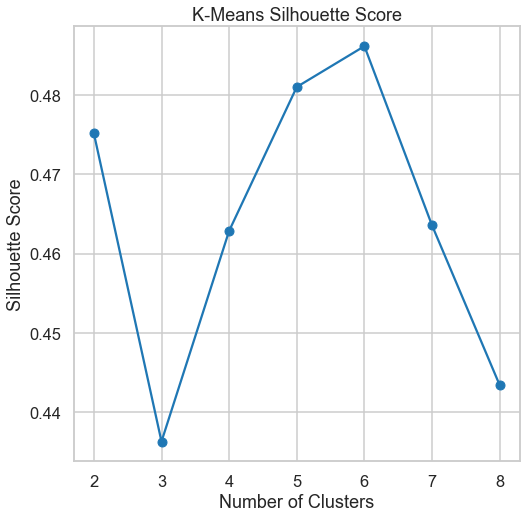

In [37]:
plt.plot(ClusterNumbers, Silhouette_score,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('K-Means Silhouette Score')

To decide best clusters number, 
observations on:
    
1)distortion function graph: My goal is to have smaller distortion function value. The distortion function typically decreases by increasing number of clusters, since each data point is closer to its assigned centroid. However, increasing the number of clusters beyond a certain point may lead to overfitting and poorer performance on unseen data. Therefore, we must also examine the silhouette score 

2)silhouette score graph: The silhouette score ranges from -1 to 1, with a higher score indicating better clustering so my goal is to get the highest value. It is seen from the graph that Number of Clusters = 6 has the highest score. Since a silhouette score close to 1 indicates that the clustering is well-separated and each data point is assigned to the correct cluster, and I want to compromise between the distortion function value and silhouette score, my chosen number of clusters is 6.

In [40]:
max(Silhouette_score)

0.48614459735646176

Best Silhouette Score = 0.48614459735646176  &  Best Number of Clusters = 6

Storing the silhouette score for the best K for later comparison with other clustering techniques

In [42]:
BestSilhouetteScoreKmeans = max(Silhouette_score)

# ----------------------------------------------------------------------------------------------------------------

# Hierarchal Clustering


* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

# ----------------------------------------------------------------------------------------------------------------

I will first plot the dendograph to determine the best number of clusters, then use this number alongside different parameters to calculate the silouhette score and choose the best one

I'll set my threshold = 5 in the dendograph to find best number of clusters

setting distance threshold cannot be done here if there is a specified number of clusters in the beginning. My next example after this one uses distance threshold without specifying number of clusters in the beginning 

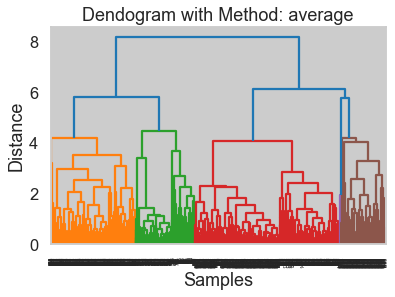

[0 0 0 ... 4 1 1]
Number of clusters: 5, Silhouette score: 0.433187948807373


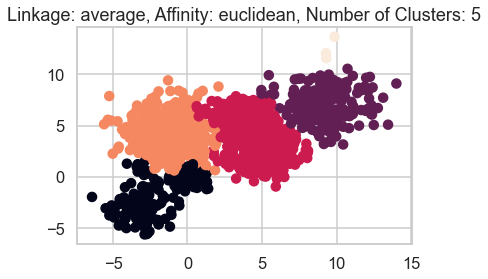

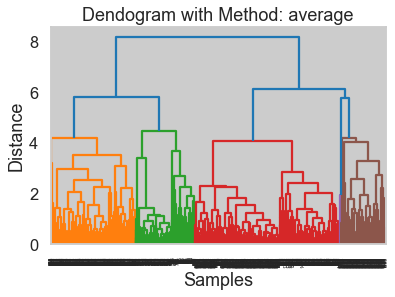

[3 3 3 ... 0 4 0]
Number of clusters: 5, Silhouette score: 0.39540970031359807


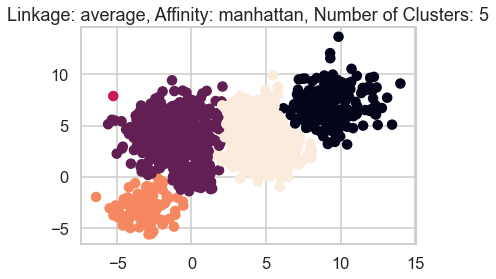

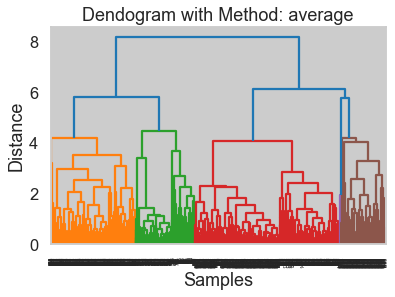

[2 2 2 ... 1 1 1]
Number of clusters: 5, Silhouette score: 0.24927357773894548


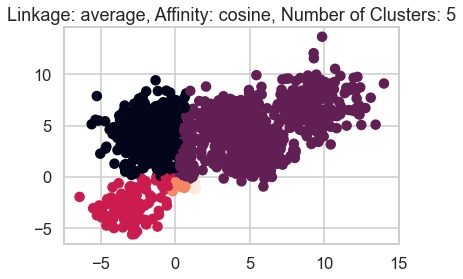

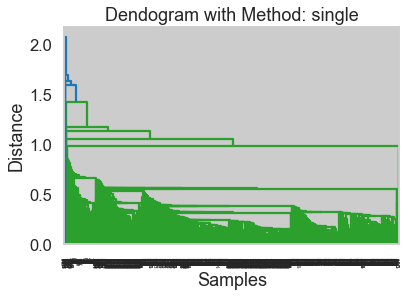

[0 0 0 ... 0 0 0]
Number of clusters = 1, silhouette won't be computed


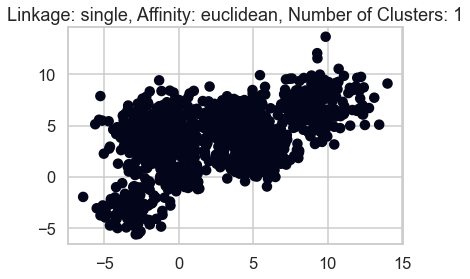

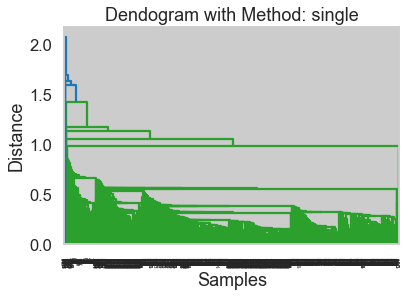

[0 0 0 ... 0 0 0]
Number of clusters = 1, silhouette won't be computed


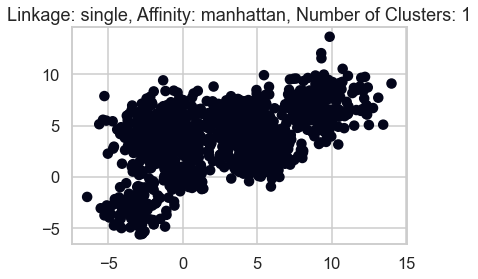

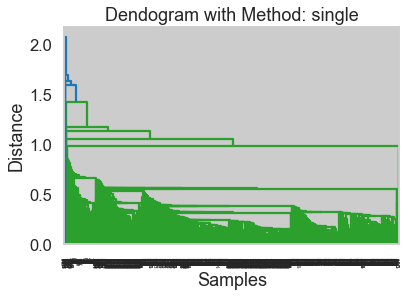

[0 0 0 ... 0 0 0]
Number of clusters = 1, silhouette won't be computed


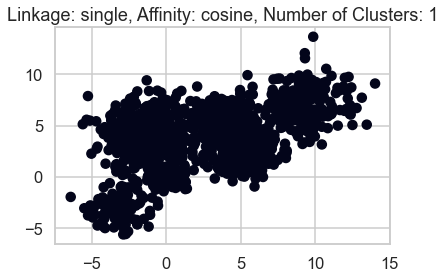

In [101]:
# AgglomerativeClustering using different affinity and linkage 
Affinity = ['euclidean','manhattan','cosine']
Linkage = ['average', 'single']
Silhouette_score_hierarchal = []
        
for l in Linkage:
    for a in Affinity:
            
               #I'll first determine the best number of clusters using dendograph
              Linkage = linkage(df, method=l)
              dendrogram(Linkage)
              plt.xlabel('Samples')
              plt.ylabel('Distance')
              plt.title(f'Dendogram with Method: {l}')
              plt.show()

              #will choose my threshold as 5
              threshold = 5

              # I'll then obtain the cluster assignments, and get best cluster number
              labels = fcluster(Linkage, threshold, criterion='distance')
              clusters = len(np.unique(labels))

              #will then perform agglomerative clustering using chosen clusters number
              HierarchicalCluster = AgglomerativeClustering(n_clusters=clusters,affinity=a, linkage=l)
              labels = HierarchicalCluster.fit_predict(df)
                
              #since the silhouette score is a measure of how similar an object is to 
              #its own cluster compared to other clusters, and it requires at least two clusters to be calculated, 
              #I'll add a condition if the number of clusters is 1 to avoid the error of not being able to calculate 
              #silhouette score 
              unique_labels = np.unique(labels)  
              if len(unique_labels) == 1:
               print("Number of clusters = 1, silhouette won't be computed")
            
              else: 
               #calculate silhouette score 
               silhouettee=silhouette_score(df, labels)
               Silhouette_score_hierarchal.append(silhouettee)
               print(f"Number of clusters: {clusters}, Silhouette score: {silhouettee}")
               
              #plotting the resulting clusters 
              plt.figure()
              plt.scatter(df['x'],df['y'], c=labels)
              plt.title(f'Linkage: {l}, Affinity: {a}, Number of Clusters: {clusters}')
              plt.show()

In [99]:
#getting best silhouette score
BestSilhouetteScoreHierarchal = max(Silhouette_score_hierarchal)
BestSilhouetteScoreHierarchal

0.433187948807373

The best silhouette score from the attempted trials results from linkage= average, affinity= euclidean and 5 clusters with value of 0.433

Trying different distance threshold, but this time the number of clusters must be set to none 

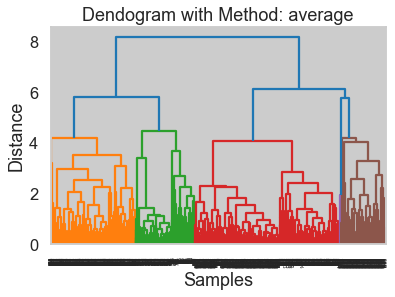

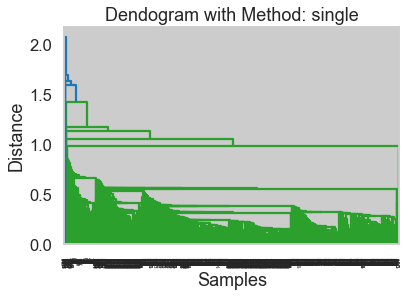

Number of clusters: 3, Silhouette score: 0.4307906732655957


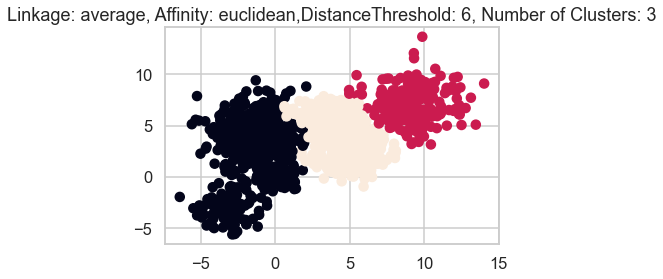

Number of clusters: 2, Silhouette score: 0.4716908069861964


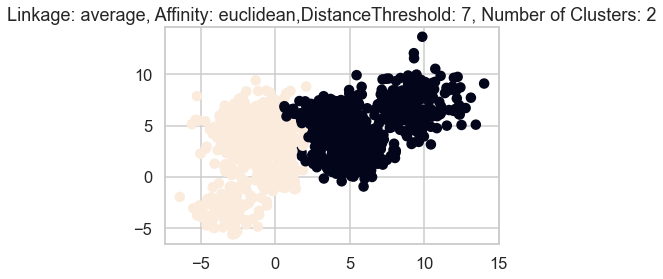

Number of clusters: 2, Silhouette score: 0.4716908069861964


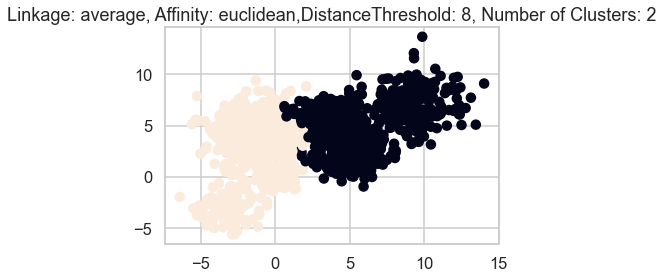

Number of clusters: 6, Silhouette score: 0.38029768112070367


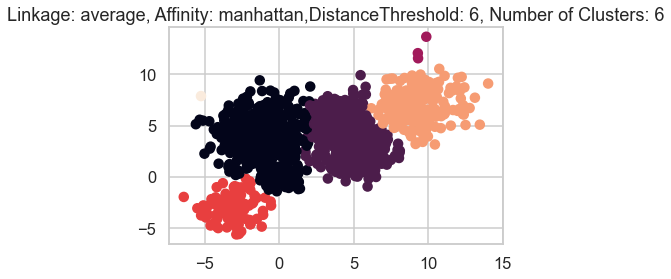

Number of clusters: 5, Silhouette score: 0.39540970031359807


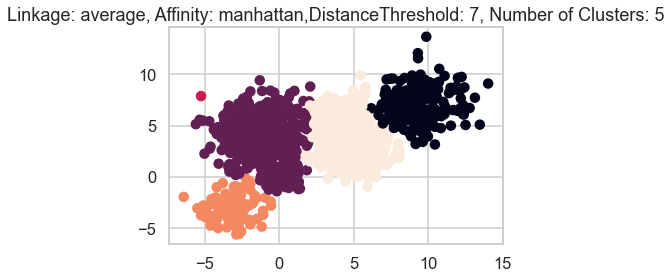

Number of clusters: 4, Silhouette score: 0.38321869346484616


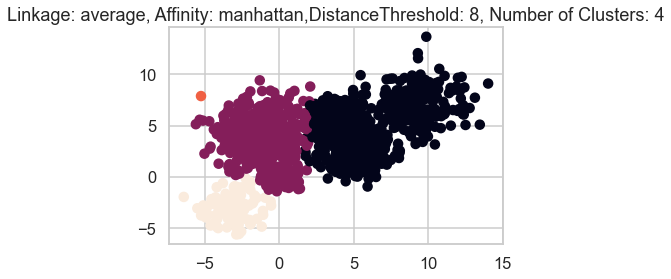

Number of clusters = 1, silhouette won't be computed


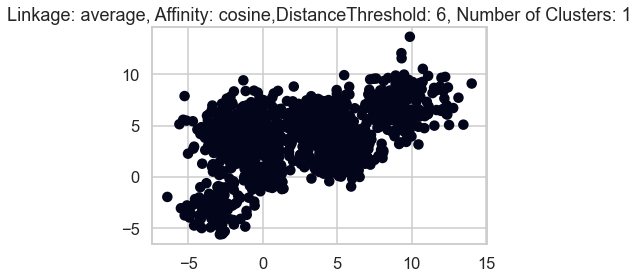

Number of clusters = 1, silhouette won't be computed


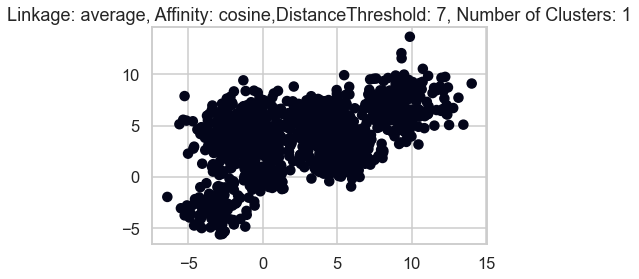

Number of clusters = 1, silhouette won't be computed


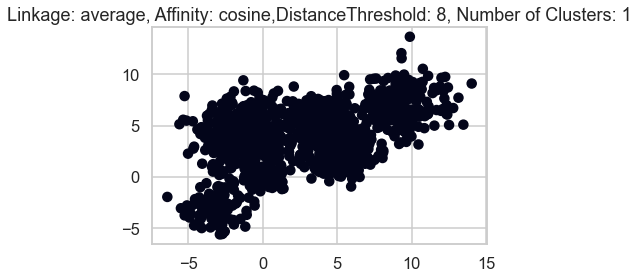

Number of clusters = 1, silhouette won't be computed


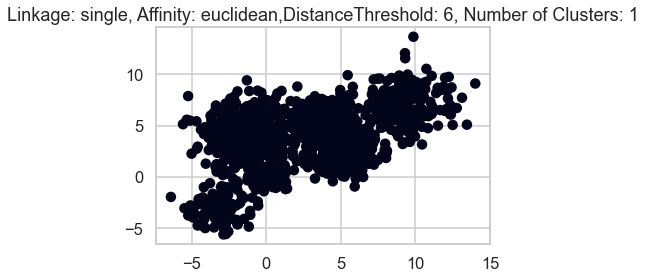

Number of clusters = 1, silhouette won't be computed


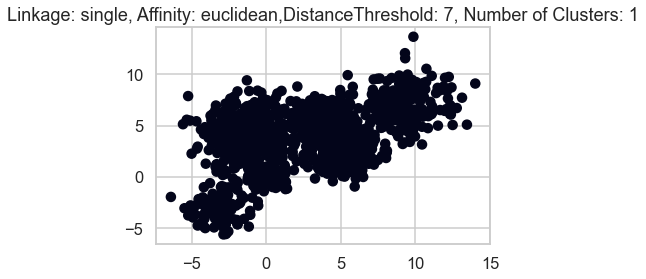

Number of clusters = 1, silhouette won't be computed


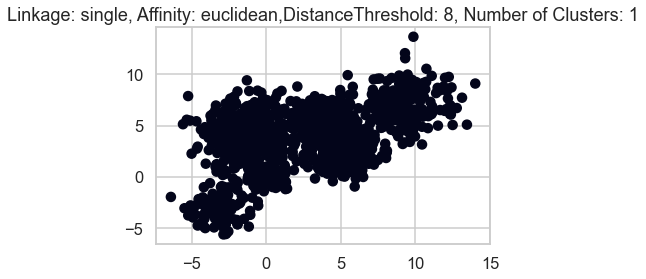

Number of clusters = 1, silhouette won't be computed


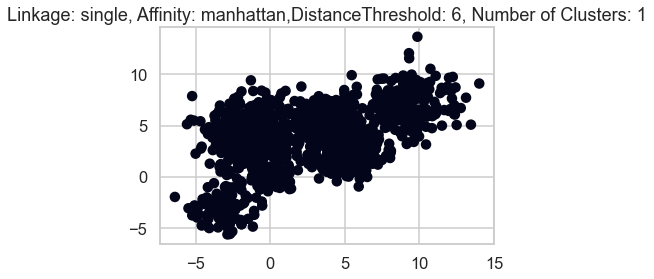

Number of clusters = 1, silhouette won't be computed


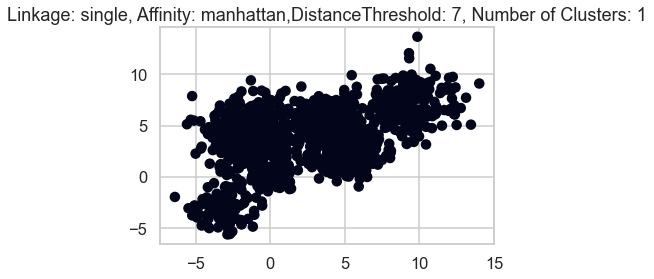

Number of clusters = 1, silhouette won't be computed


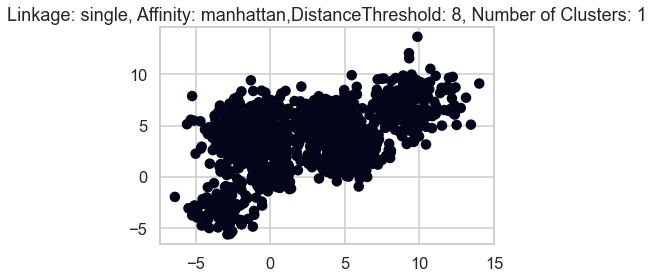

Number of clusters = 1, silhouette won't be computed


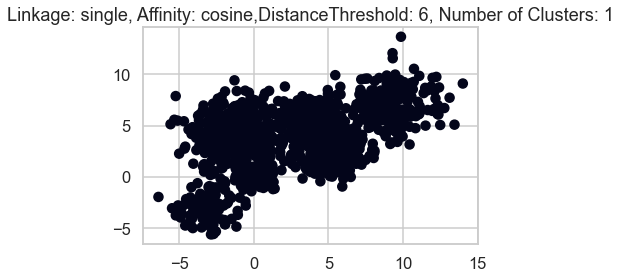

Number of clusters = 1, silhouette won't be computed


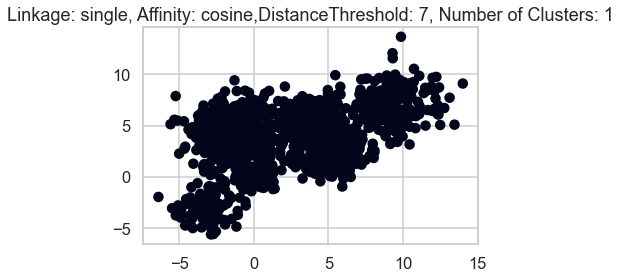

Number of clusters = 1, silhouette won't be computed


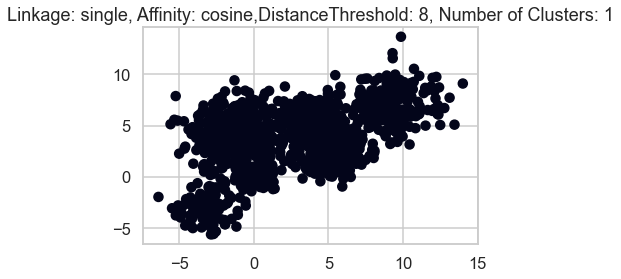

In [136]:
#trying different distance threshold, but this time the number of clusters must be set to none 
Distance_Threshold=[6, 7 ,8]
Affinity1 = ['euclidean','manhattan','cosine']
Linkage1 = ['average', 'single']
Linkage2 = ['average', 'single']
Silhouette_score_hierarchal2 = []

for h in Linkage2:
               #plotting dendograph first
               Linkagee = linkage(df, method=h)
               dendrogram(Linkagee)
               plt.xlabel('Samples')
               plt.ylabel('Distance')
               plt.title(f'Dendogram with Method: {h}')
               plt.show()
                
                
for i in Linkage1:
    for x in Affinity1:
        for d in Distance_Threshold:
               model = AgglomerativeClustering(n_clusters=None, linkage=i, affinity=x, distance_threshold=d)
               labelss = model.fit_predict(df)
               n_clusters = len(np.unique(labelss))

               unique_labelss = np.unique(labelss)  
               if len(unique_labelss) == 1:
                print("Number of clusters = 1, silhouette won't be computed")
            
               else: 
                #calculate silhouette score 
                silhouetteee=silhouette_score(df, labelss)
                Silhouette_score_hierarchal2.append(silhouetteee)
                print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouetteee}")
               
              #plotting the resulting clusters 
               plt.figure()
               plt.scatter(df['x'],df['y'], c=labelss)
               plt.title(f'Linkage: {i}, Affinity: {x},DistanceThreshold: {d}, Number of Clusters: {n_clusters}')
               plt.show()
                
              


In [137]:
#getting best silhouette score of hierarchal clustering with distance threshold set
BestSilhouetteScoreHierarchal2 = max(Silhouette_score_hierarchal2)
BestSilhouetteScoreHierarchal2

0.4716908069861964

The best silhouette score from the attempted trials results from linkage= average, affinity= euclidean, distance_threshold=6 and 3 clusters with value of 0.472

# ----------------------------------------------------------------------------------------------------------------

# DBScan


* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

# ----------------------------------------------------------------------------------------------------------------

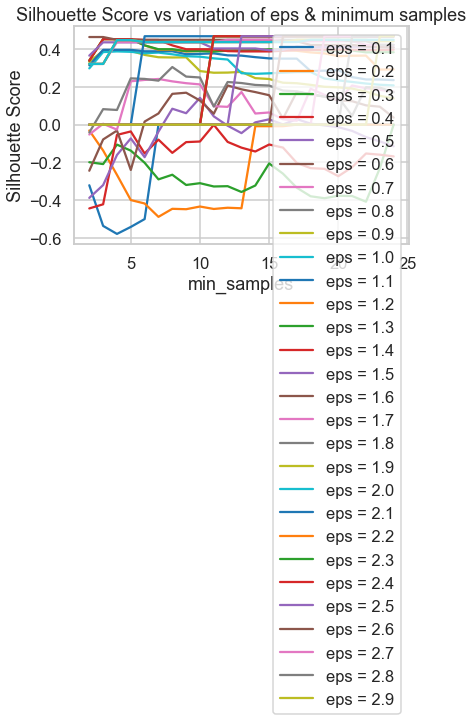

In [167]:
eps = np.arange (0.1, 3, 0.1)
min_samples = range(2,25)
silhouette_scores_db = np.zeros((len(eps), len(min_samples))) #I'll first will initialize silhouette score array
#with (eps x min_samples) size to store value of each variation of both values 

# will compute silhouette scores for different values of eps and min_samples
for i, e in enumerate(eps):
    for j, minsamples in enumerate(min_samples):
        dbscan = DBSCAN(eps=e, min_samples=minsamples).fit(df)
        labels = dbscan.labels_
        if len(set(labels)) > 1: #will calculate silhouette for only number of clusters>1
            silhouette_scores_db[i,j] = silhouette_score(df, labels)

# Plot silhouette scores with variation of eps and min samples
plt.figure()
for i, e in enumerate(eps):
    plt.plot(min_samples, silhouette_scores_db[i,:], label='eps = {:.1f}'.format(e))
plt.title('Silhouette Score vs variation of eps & minimum samples')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

Will now choose best silhouette score to get best parameters and plot resulting clusters

In [373]:
best_idx = np.unravel_index(np.argmax(silhouette_scores_db), silhouette_scores_db.shape) #best score index 
best_eps = eps[best_idx[0]] #getting best eps value 
best_min_samples = min_samples[best_idx[1]] #getting best min_samples value 
best_score = silhouette_scores_db[best_idx] #getting best score 

0.6394160994274304

Will now perform dbscan clustering with the best chosen parameters

[ 0  0  0 ... -1  0  0]


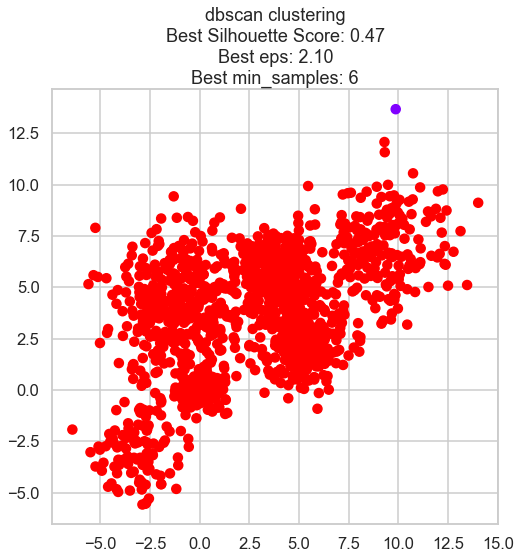

In [237]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(df)
print(dbscan_labels)
plt.scatter(df['x'], df['y'], c=dbscan_labels, cmap='rainbow')
plt.title(f'dbscan clustering\nBest Silhouette Score: {best_score:.2f}\nBest eps: {best_eps:.2f}\nBest min_samples: {best_min_samples}')
plt.show()

# ----------------------------------------------------------------------------------------------------------------

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

# ----------------------------------------------------------------------------------------------------------------

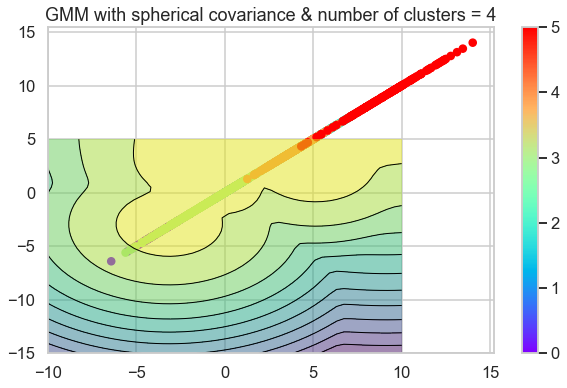

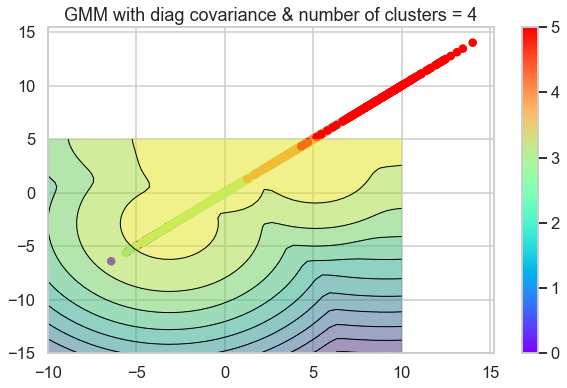

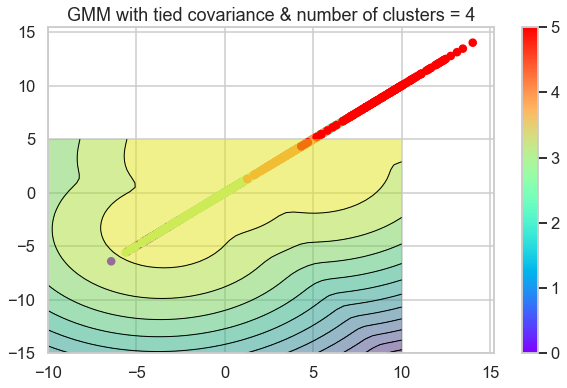

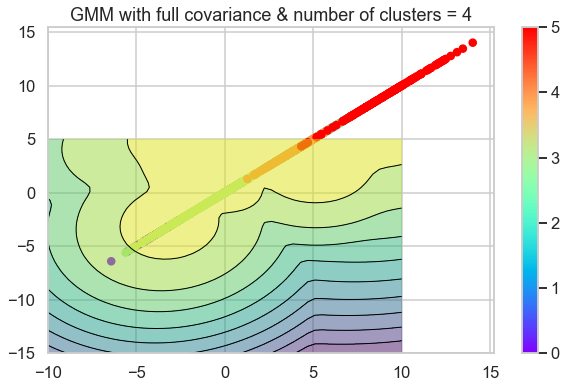

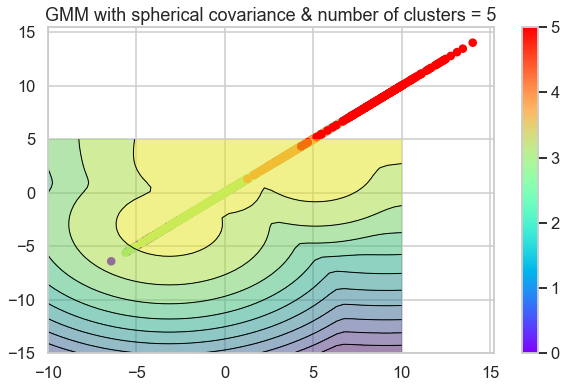

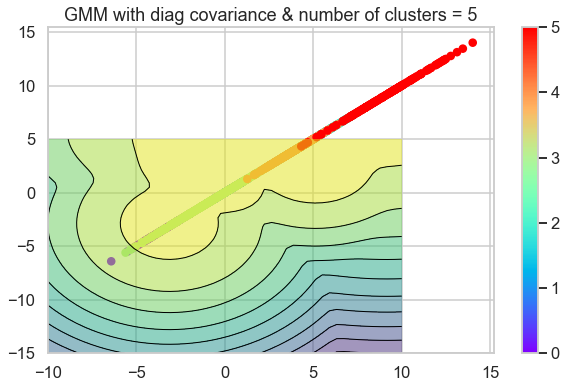

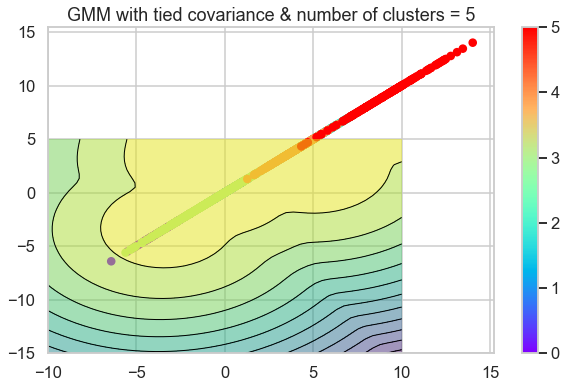

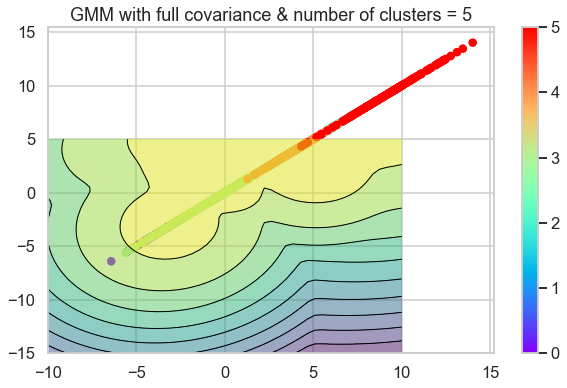

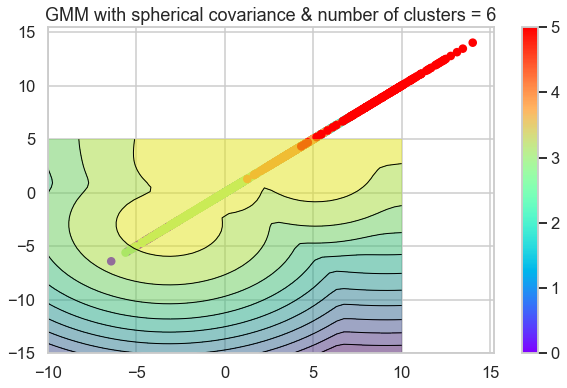

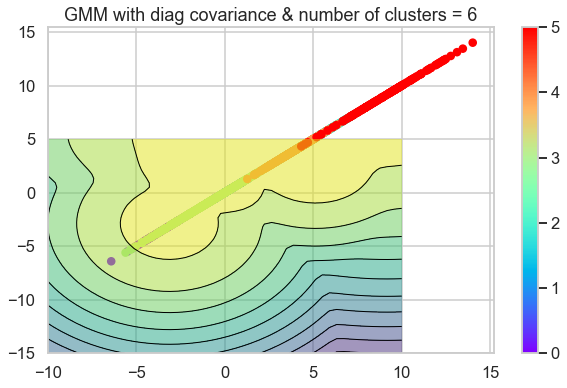

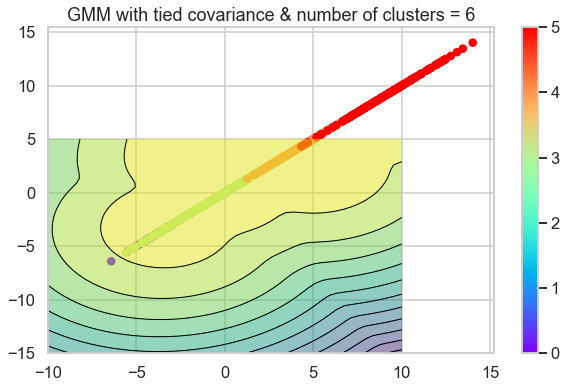

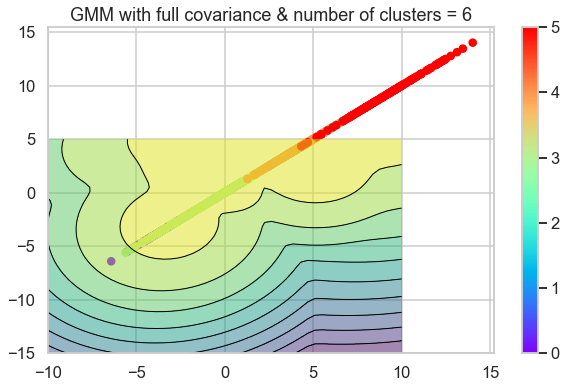

In [238]:
#covariance options 
covariances = ['spherical', 'diag', 'tied', 'full']
DifferrentClusters=[4,5,6]
for q  in DifferrentClusters: #for different number of clusters 
#looping through the covariance types
 for i in range(len(covariances)):
    #fitting the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, covariance_type=covariances[i], random_state=0)
    gmm.fit(df)
    
    #plotting the resulting distributions
    plt.figure(figsize=(10, 6))
    plt.scatter(df['x'], df['x'], c=forGMM, cmap='rainbow', s=50)
    plt.colorbar()
    
    x = np.linspace(-10, 10)
    y = np.linspace(-15, 5)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -gmm.score_samples(XX)
    Z = Z.reshape(X.shape)
    
    plt.contour(X, Y, Z, levels=10, linewidths=1, colors='black')
    plt.contourf(X, Y, Z, levels=10, cmap='viridis_r', alpha=0.5)
    
    plt.title(f'GMM with {covariances[i]} covariance & number of clusters = {q}')
    plt.show()


    

Another solution 

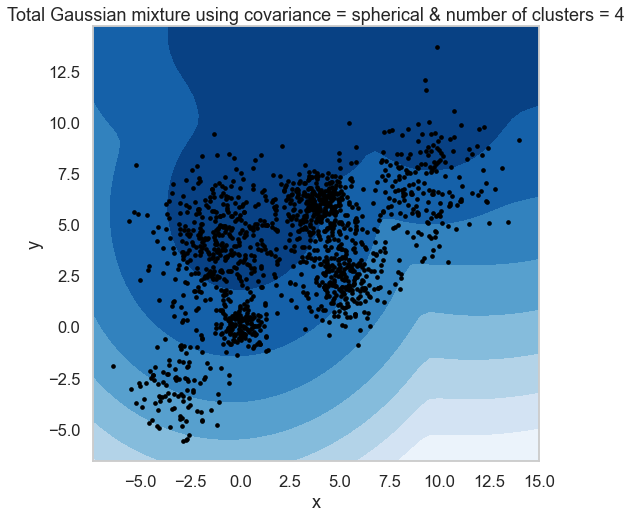

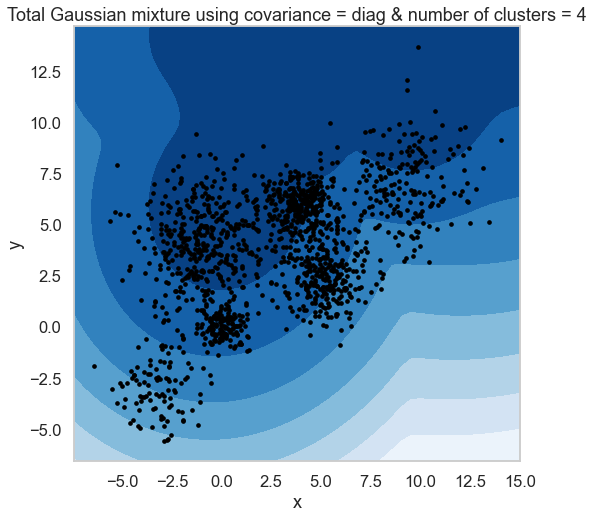

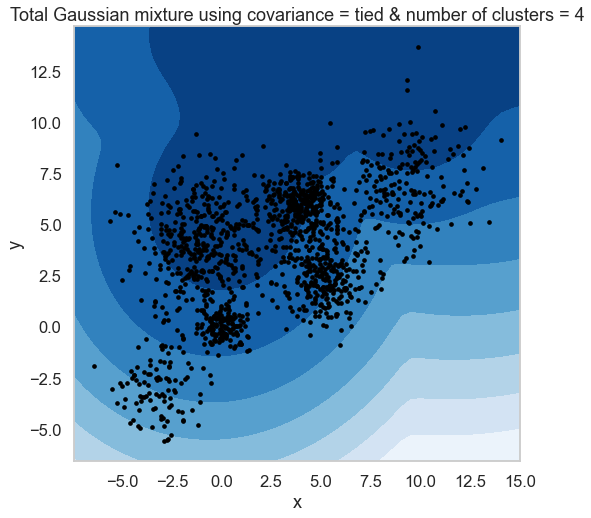

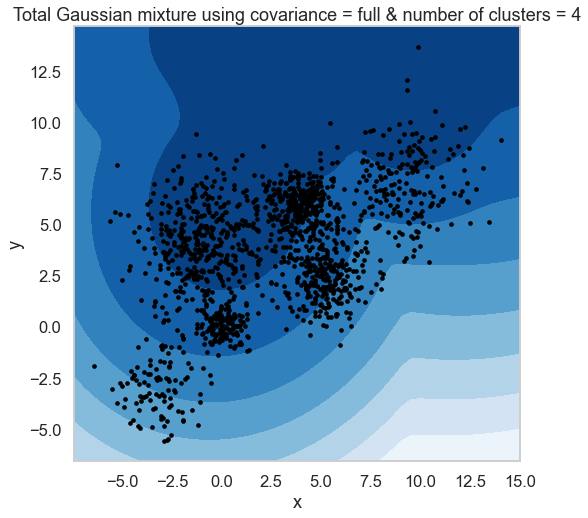

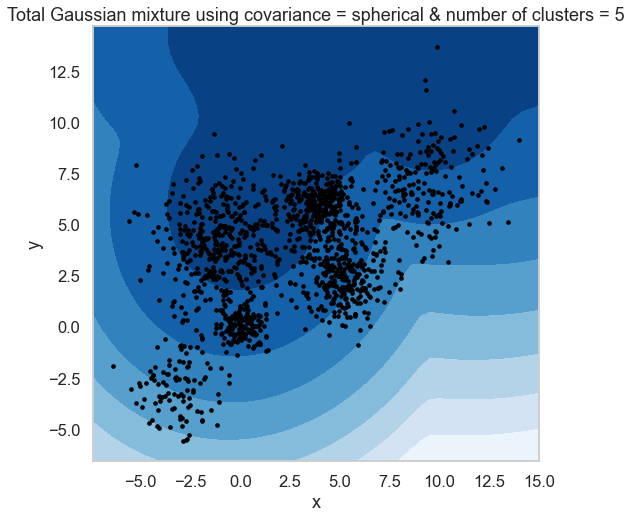

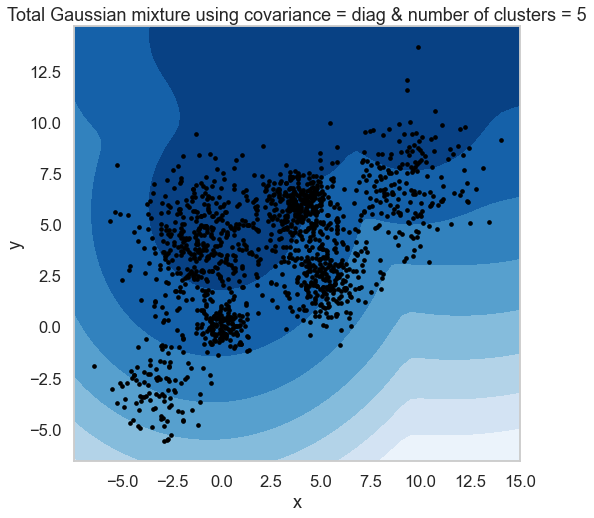

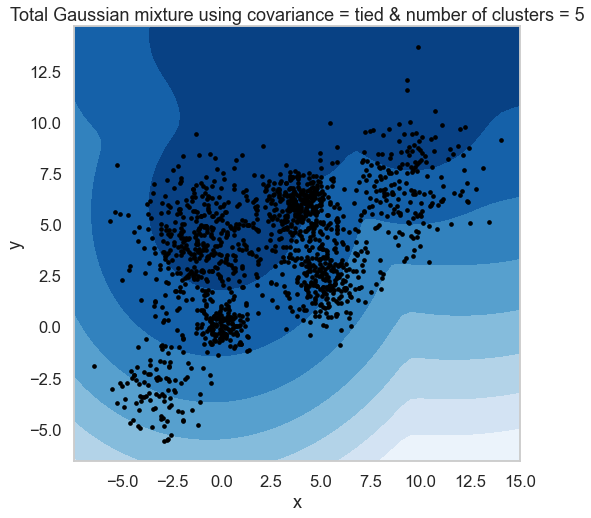

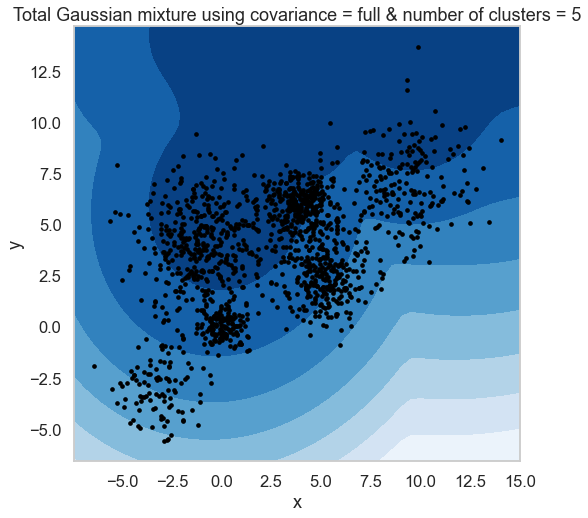

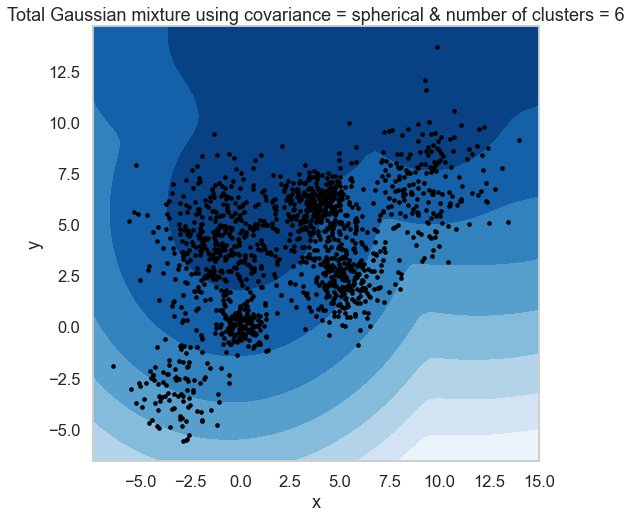

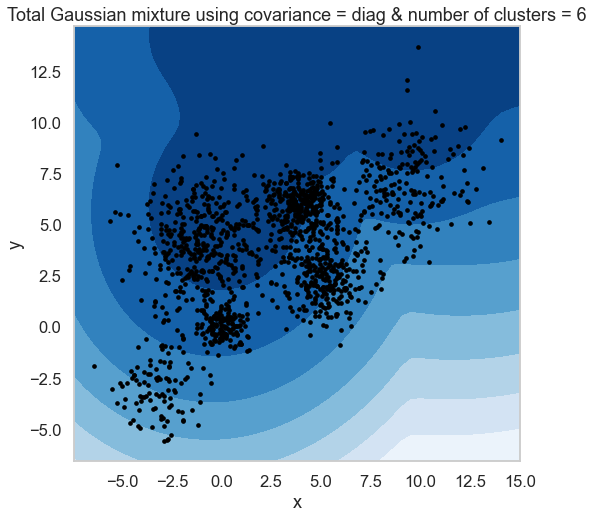

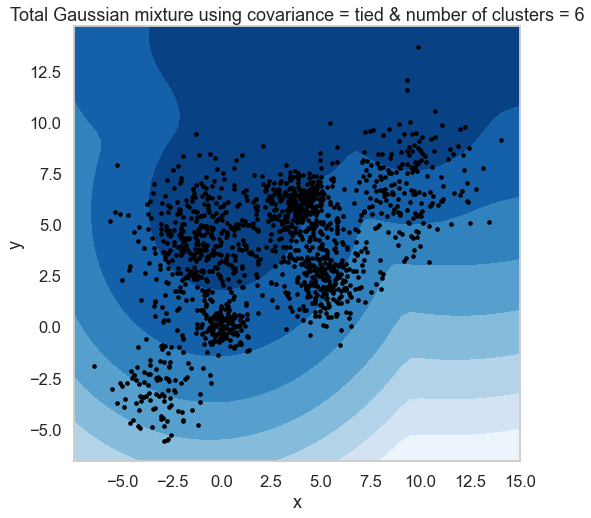

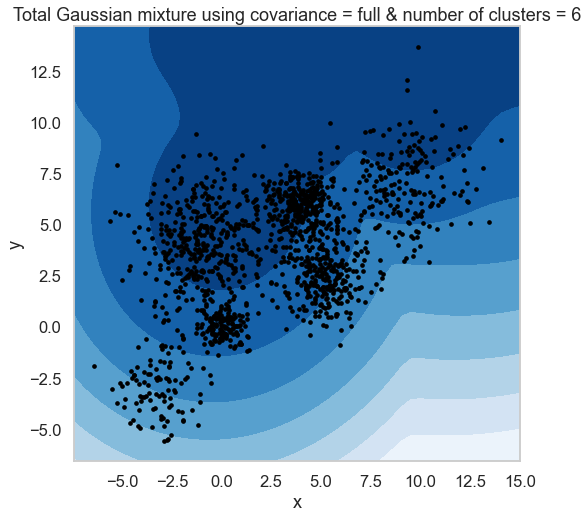

In [245]:
covariances1 = ['spherical', 'diag', 'tied', 'full']
DifferrentClusters2=[4,5,6]
for q2  in DifferrentClusters2:
 for o in range(len(covariances1)):
    #fitting the Gaussian Mixture Model
    gmm1 = GaussianMixture(n_components=q2, covariance_type=covariances[o], random_state=0)
    gmm1.fit(df)
    
    #evaluating the log-probability density of the data under the model
    log_density = gmm.score_samples(df)

    #computing the probability density as exp(log_density)
    density = np.exp(log_density)

 #creating a 2D grid of points to evaluate the probability density
    x_min, x_max = df['x'].min() - 1, df['x'].max() + 1
    y_min, y_max = df['y'].min() - 1, df['y'].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
    grid = np.c_[xx.ravel(), yy.ravel()]

#evaluating the probability density on the grid
    Z1 = np.exp(gmm.score_samples(grid))
    Z1 = Z.reshape(xx.shape)

#creating a 2D contour plot of the total Gaussian mixture
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    plt.scatter(df['x'], df['y'], s=10, color='black')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Total Gaussian mixture using covariance = {covariances[o]} & number of clusters = {q2}')
    plt.show()

# ----------------------------------------------------------------------------------------------------------------

Conclusion: for the first 3 clustering techniques, it is shown that k means with 6 clusters generates the lowest silouhette score so it is the best one to use for the multi blob dataset

# ----------------------------------------------------------------------------------------------------------------

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [314]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

# ----------------------------------------------------------------------------------------------------------------

I'll start by examining the data

In [315]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

converting beneficial data in arrays to a dataframe

In [322]:
irisdf = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'] )
irisdf['target names'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)
irisdatadf= pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
irisdatadf

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

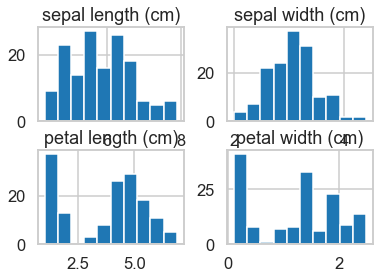

In [323]:
#dataset with the float values only
irisdatadf.hist() 

Not all features are normally distributed, so normalization is needed

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

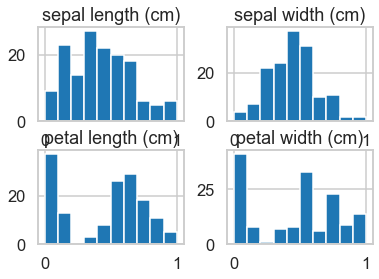

In [324]:
scaler = MinMaxScaler()
#Normalizing  the dataset 
normalizedarray = scaler.fit_transform(irisdatadf)
normalizeddf=pd.DataFrame(normalizedarray, columns=['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)'])
normalizeddf.hist() #data normalized to be range from 0 to 1 

<AxesSubplot:>

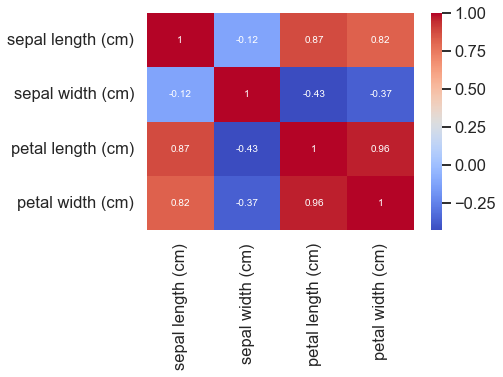

In [325]:
corr_matrix = normalizeddf.corr()

import seaborn as sns

#creating heatmap to check the correlation between features to reduce them
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

we want to reduce the 4 features to be able to do the plots.
Since PCA works best when the original features are highly correlated, This may not be the case here since only 50% of the features are correlated which is not enough so cannot reduce to 2 features.
will choose a 2 highly correlated features to reduce which for example in this case petal width and petal length to have a final dataset of 3 features

In [342]:
features_to_reduce = normalizeddf[['petal length (cm)','petal width (cm)']].values 

#initializing PCA object with 1 component
pca = PCA(n_components=1)

#fitting the PCA object to the feature array
pca.fit(features_to_reduce)

#transforming the feature array using the fitted PCA object
reduced_feat = pca.transform(features_to_reduce)

final_irisdf = pd.concat([normalizeddf[['sepal length (cm)', 'sepal width (cm)']] ,pd.DataFrame(reduced_feat, columns=['reduced_feature'])], axis=1)
#concatenating  the transformed columns with the other columns of the original dataset to form a new dataset with 3 features.
final_irisdf

sepal length (cm)  sepal width (cm)  reduced_feature
0             0.222222          0.625000        -0.577124
1             0.166667          0.416667        -0.577124
2             0.111111          0.500000        -0.588732
3             0.083333          0.458333        -0.565516
4             0.194444          0.666667        -0.577124
..                 ...               ...              ...
145           0.666667          0.416667         0.501560
146           0.555556          0.208333         0.356900
147           0.611111          0.416667         0.410477
148           0.527778          0.583333         0.524776
149           0.444444          0.416667         0.338148

[150 rows x 3 columns]

# ----------------------------------------------------------------------------------------------------------------

# Kmeans iris dataset

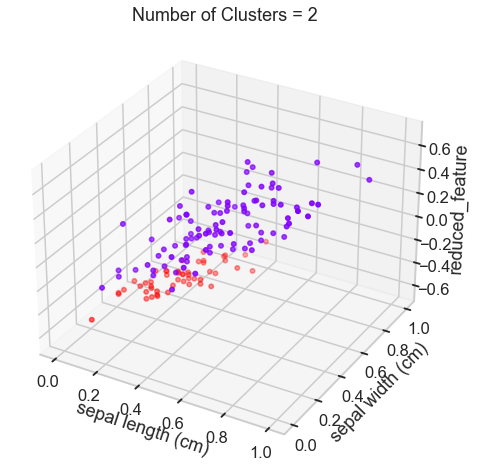

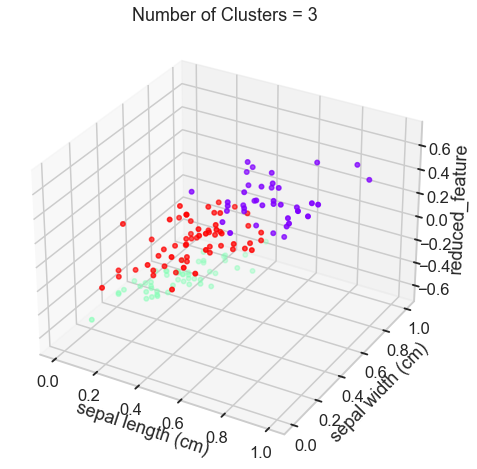

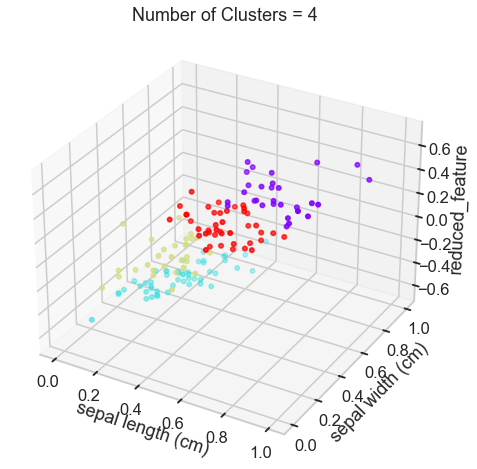

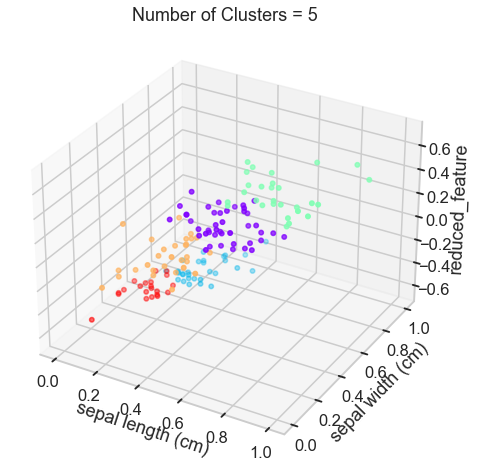

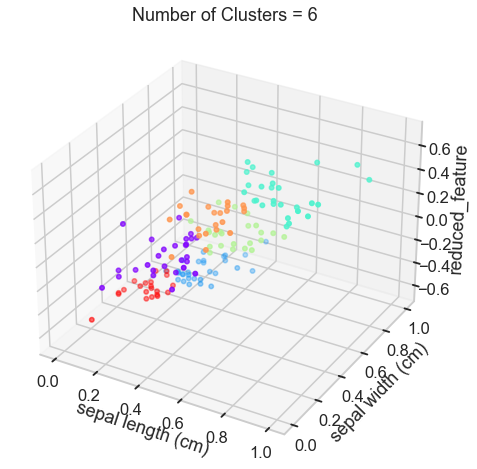

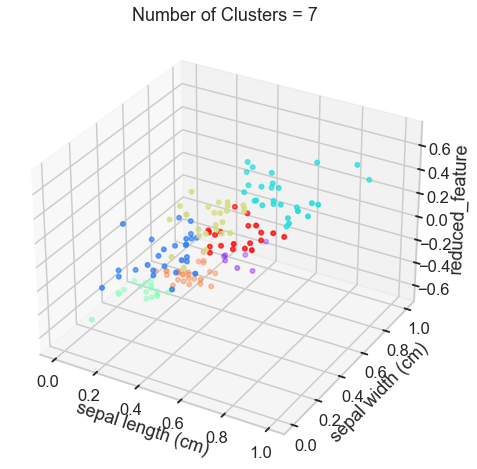

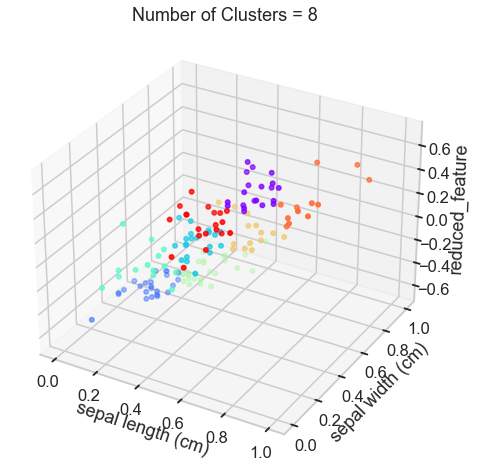

In [344]:
ClusterNumbers_iris = range(2, 9) 
DistortionFunction_iris = []
Silhouette_score_iris = []

for k in ClusterNumbers_iris:
    
    # model fitting
    kmeans = KMeans(n_clusters=k, random_state=42).fit(final_irisdf)
    
    #clustering plot
    clusters=kmeans.fit_predict(final_irisdf)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(final_irisdf['sepal length (cm)'],final_irisdf['sepal width (cm)'],final_irisdf['reduced_feature'],c=clusters,cmap='rainbow') 
    ax.set_xlabel('sepal length (cm)')
    ax.set_ylabel('sepal width (cm)')
    ax.set_zlabel('reduced_feature')
    plt.title("Number of Clusters = {}".format(k))
    plt.show() 
    
    
    #distortion function
    distortioniris = kmeans.inertia_
    DistortionFunction_iris.append(distortioniris)
    
    #silhouette score
    labelsiris = kmeans.labels_
    silhouetteiris = silhouette_score(final_irisdf, labelsiris)
    Silhouette_score_iris.append(silhouetteiris)

# plotting the 2 graphs for iris dataset: distortion function and silhouette score

Text(0.5, 1.0, 'Distortions of K-Means Iris Dataset')

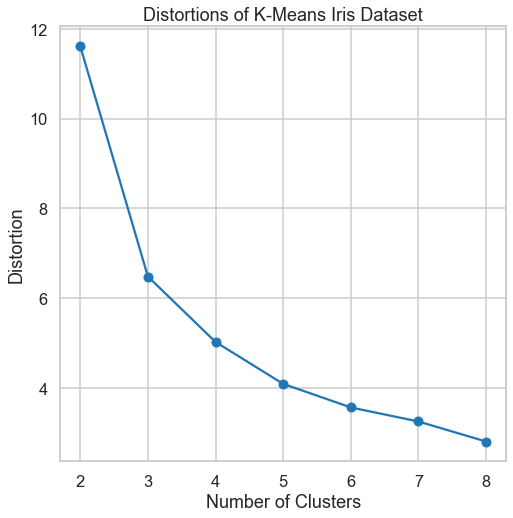

In [345]:
plt.plot(ClusterNumbers_iris, DistortionFunction_iris, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Distortions of K-Means Iris Dataset')

Text(0.5, 1.0, 'K-Means Silhouette Score Iris Dataset')

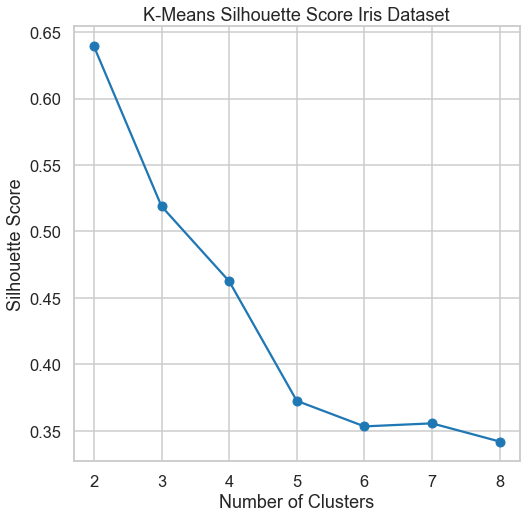

In [348]:
plt.plot(ClusterNumbers_iris, Silhouette_score_iris,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('K-Means Silhouette Score Iris Dataset')

To decide best clusters number, 
observations on:
    
1)distortion function graph: My goal is to have smaller distortion function value. The distortion function typically decreases by increasing number of clusters, since each data point is closer to its assigned centroid. However, increasing the number of clusters beyond a certain point may lead to overfitting and poorer performance on unseen data. Therefore, we must also examine the silhouette score 

2)silhouette score graph: The silhouette score ranges from -1 to 1, with a higher score indicating better clustering so my goal is to get the highest value. It is seen from the graph that Number of Clusters = 2 has the highest score. Since a silhouette score close to 1 indicates that the clustering is well-separated and each data point is assigned to the correct cluster, and I want to compromise between the distortion function value and silhouette score, my chosen number of clusters is 2.

Storing the silhouette score for the best K for later comparison with other clustering techniques

In [350]:
BestSilhouetteScoreKmeansIrisDataset = max(Silhouette_score_iris)
BestSilhouetteScoreKmeansIrisDataset

0.6394160994274304

# ----------------------------------------------------------------------------------------------------------------

# Hierarchal Clustering Iris Dataset

# ----------------------------------------------------------------------------------------------------------------

will try different values for affinity, linkage and distance threshold for the iris dataset

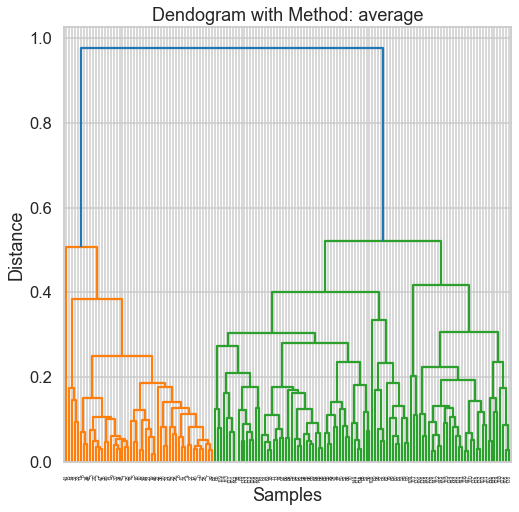

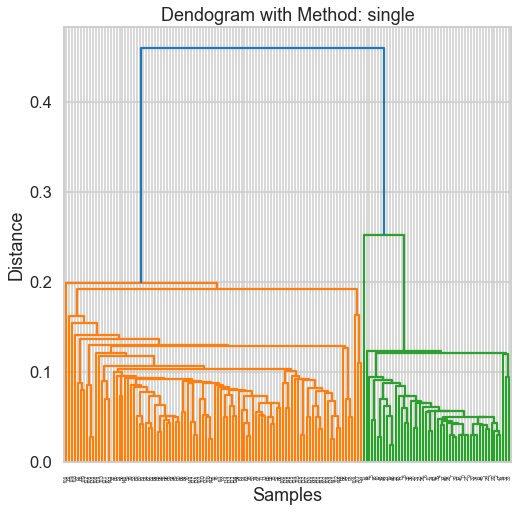

Number of clusters: 10, Silhouette score: 0.3101002133598878


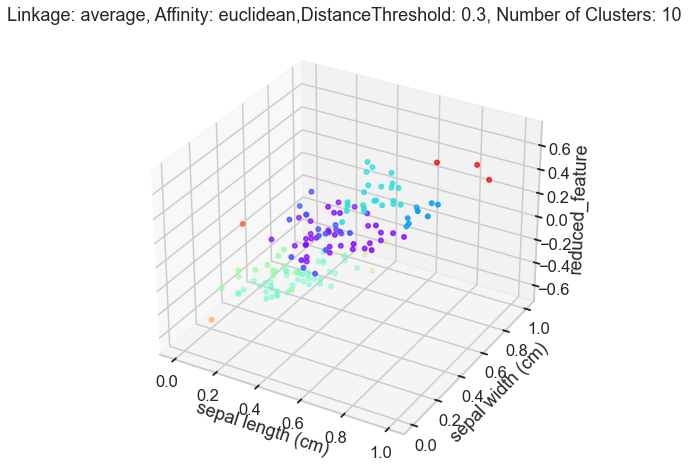

Number of clusters: 5, Silhouette score: 0.4046418793207224


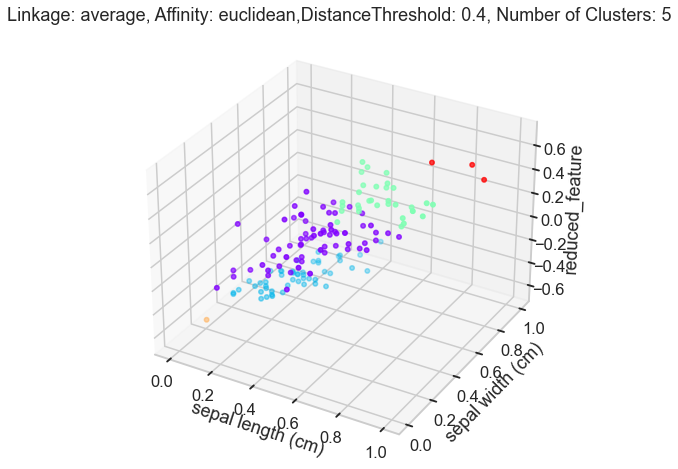

Number of clusters: 4, Silhouette score: 0.43707779899024624


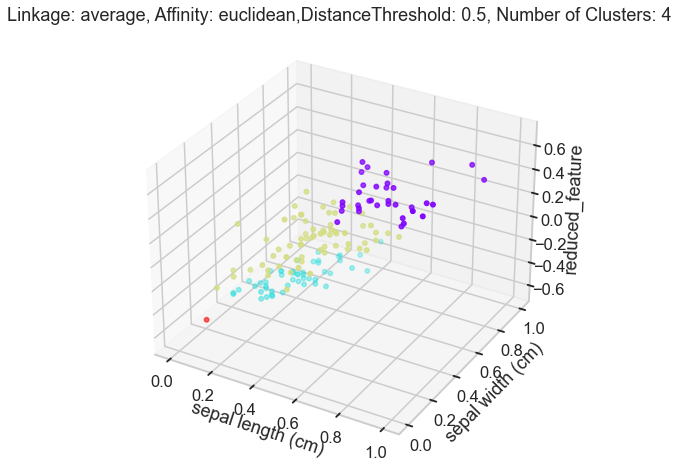

Number of clusters: 20, Silhouette score: 0.3055790611112856


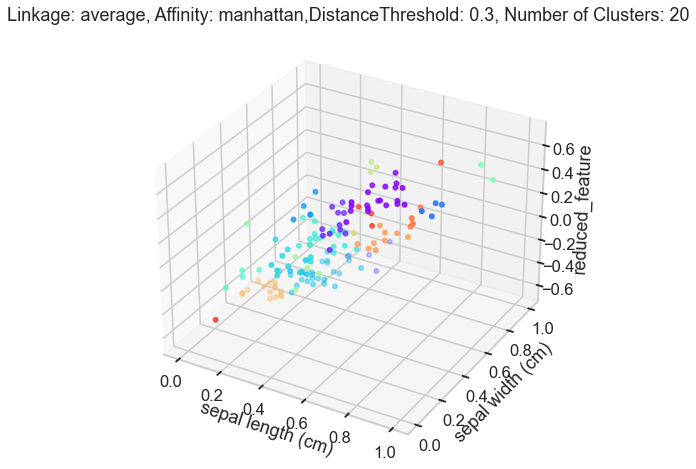

Number of clusters: 12, Silhouette score: 0.33511377368807893


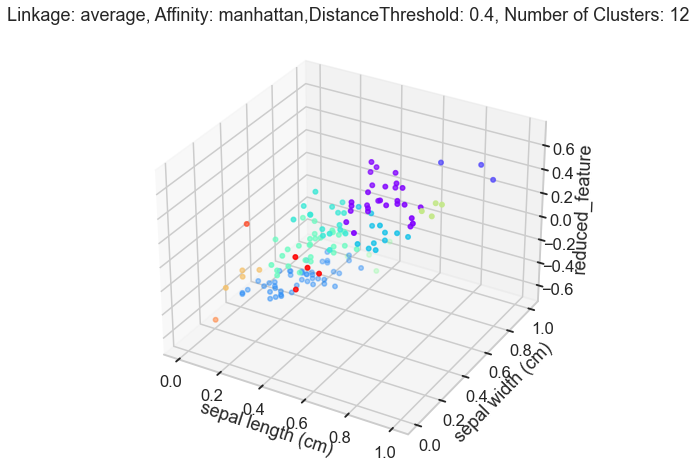

Number of clusters: 7, Silhouette score: 0.3013100881521198


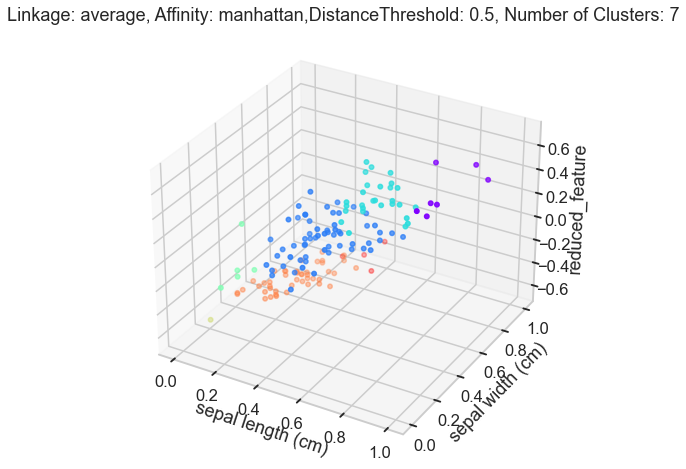

Number of clusters: 3, Silhouette score: 0.441627813408213


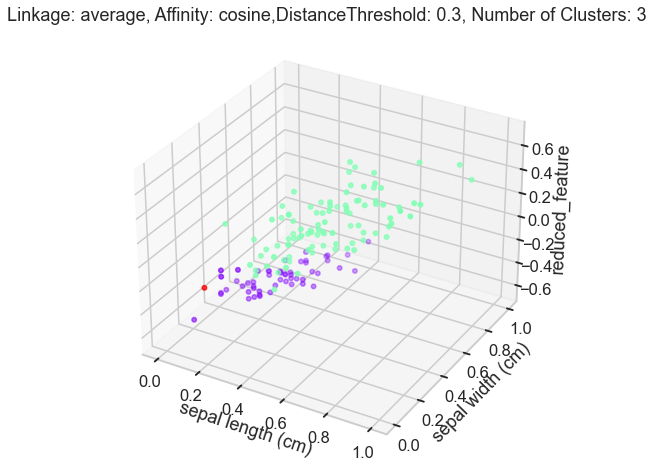

Number of clusters: 3, Silhouette score: 0.441627813408213


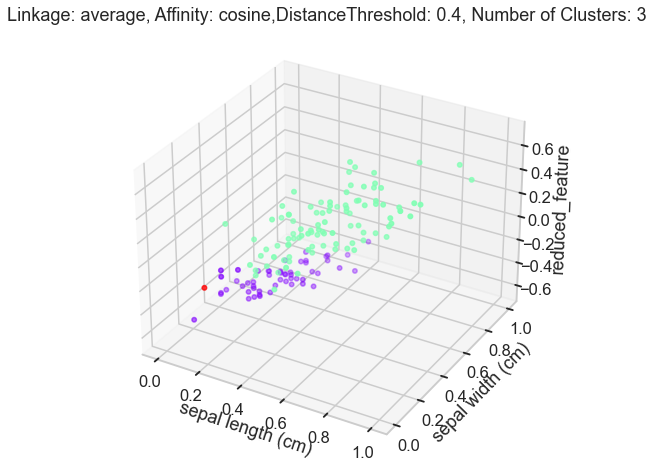

Number of clusters: 2, Silhouette score: 0.6276064178254456


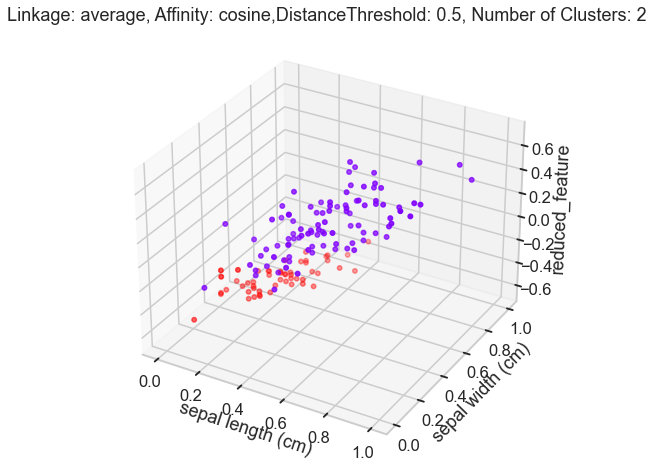

Number of clusters: 2, Silhouette score: 0.6394160994274304


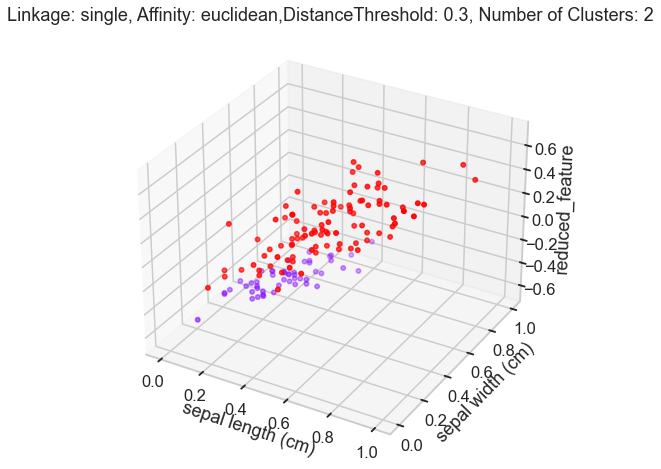

Number of clusters: 2, Silhouette score: 0.6394160994274304


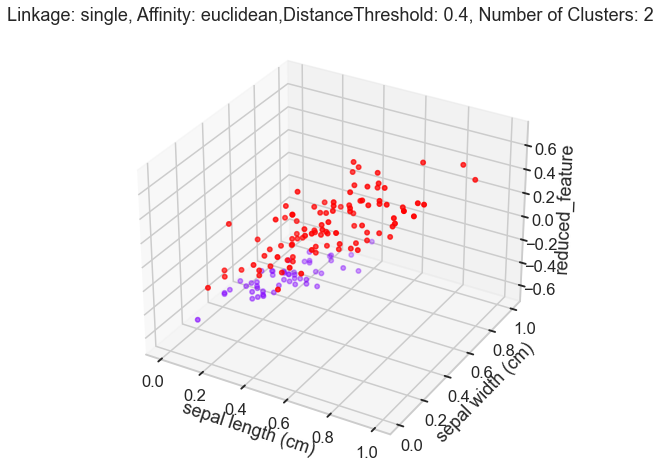

Number of clusters = 1, silhouette won't be computed


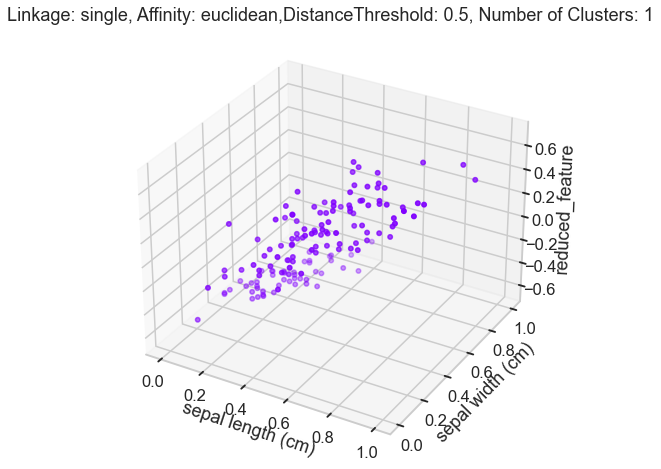

Number of clusters: 4, Silhouette score: 0.281784952364977


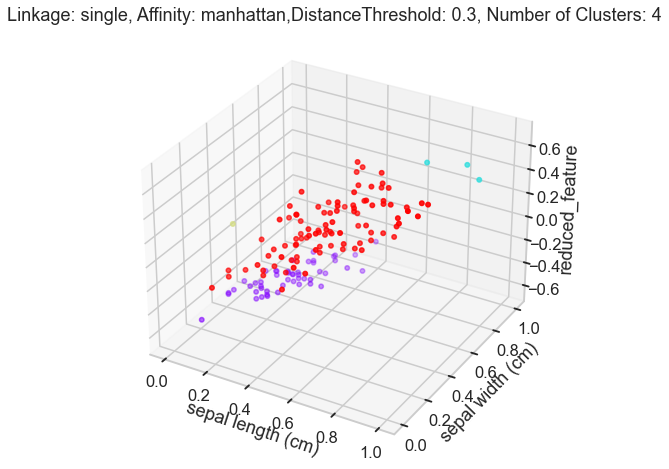

Number of clusters: 2, Silhouette score: 0.6394160994274304


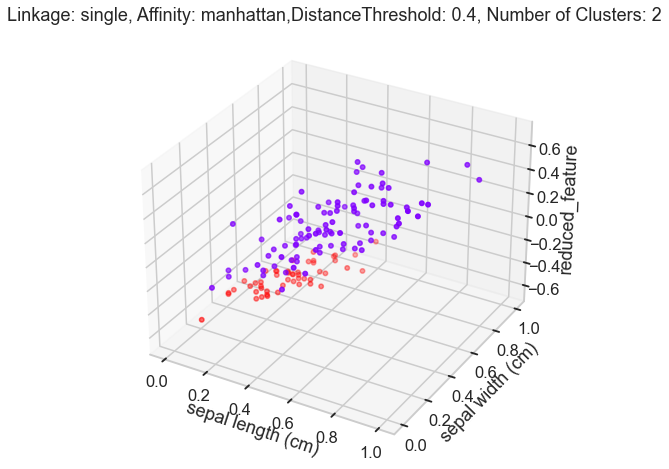

Number of clusters: 2, Silhouette score: 0.6394160994274304


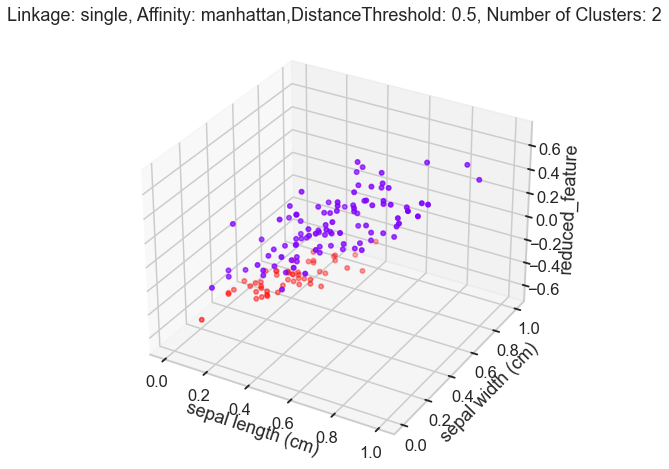

Number of clusters = 1, silhouette won't be computed


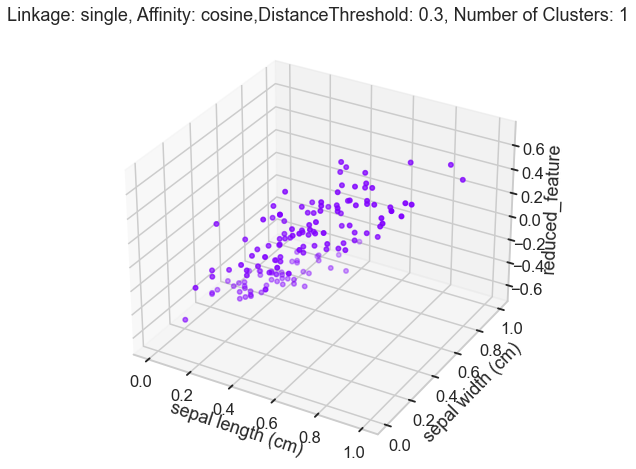

Number of clusters = 1, silhouette won't be computed


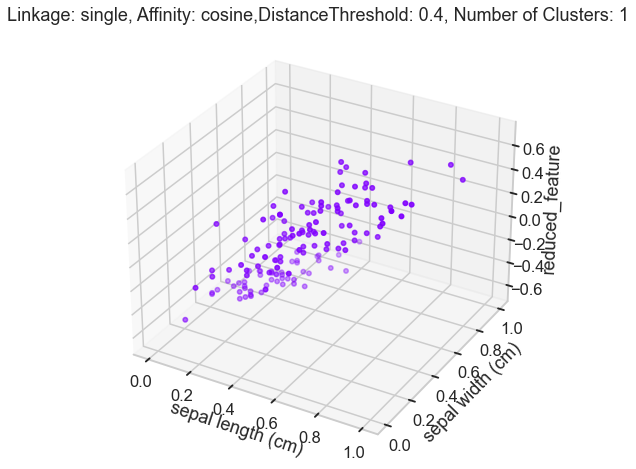

Number of clusters = 1, silhouette won't be computed


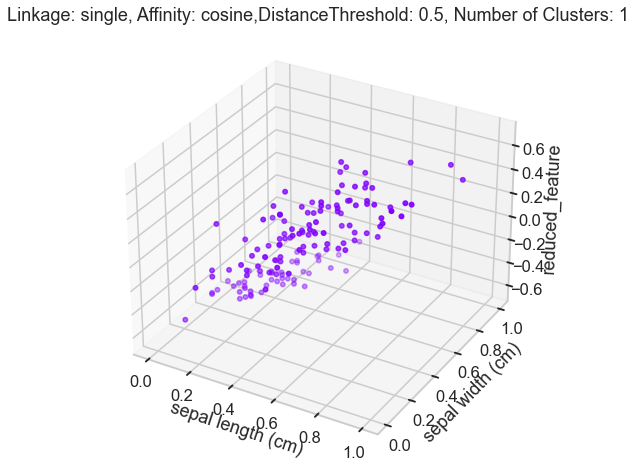

In [365]:
#trying different parameters with number of clusters set to none 
Distance_Threshold_iris=[0.3, 0.4 ,0.5]
Affinity_iris = ['euclidean','manhattan','cosine']
Linkage_iris = ['average', 'single']
Silhouette_score_h_iris = []

for s in Linkage_iris:
               #plotting dendograph first
               LinkageIris = linkage(final_irisdf, method=s)
               dendrogram(LinkageIris)
               plt.xlabel('Samples')
               plt.ylabel('Distance')
               plt.title(f'Dendogram with Method: {s}')
               plt.show()
                
                
for i in Linkage_iris:
    for x in Affinity_iris:
        for d in Distance_Threshold_iris:
               model = AgglomerativeClustering(n_clusters=None, linkage=i, affinity=x, distance_threshold=d)
               labels_iris = model.fit_predict(final_irisdf)
               n_clusters = len(np.unique(labels_iris))

               unique_labels_iris = np.unique(labels_iris)  
               if len(unique_labels_iris) == 1:
                print("Number of clusters = 1, silhouette won't be computed")
            
               else: 
                #calculate silhouette score 
                silhouette_h_iris=silhouette_score(final_irisdf, labels_iris)
                Silhouette_score_h_iris.append(silhouette_h_iris)
                print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouette_h_iris}")
               
              #plotting the resulting clusters 
               fig1 = plt.figure()
               ax1 = fig1.add_subplot(111, projection='3d')
               ax1.scatter(final_irisdf['sepal length (cm)'],final_irisdf['sepal width (cm)'],final_irisdf['reduced_feature'],c=labels_iris,cmap='rainbow') 
               ax1.set_xlabel('sepal length (cm)')
               ax1.set_ylabel('sepal width (cm)')
               ax1.set_zlabel('reduced_feature')
               plt.title(f'Linkage: {i}, Affinity: {x},DistanceThreshold: {d}, Number of Clusters: {n_clusters}')
               plt.show()
                
              


In [366]:
BestSilhouetteScoreHierarchalIris = max(Silhouette_score_h_iris)
BestSilhouetteScoreHierarchalIris

0.6394160994274304

The best silhouette score from the attempted trials results from linkage= single, affinity= euclidean, distance_threshold= 0.3 and 2 clusters with value of 0.639

# ----------------------------------------------------------------------------------------------------------------

# DBScan Iris Dataset

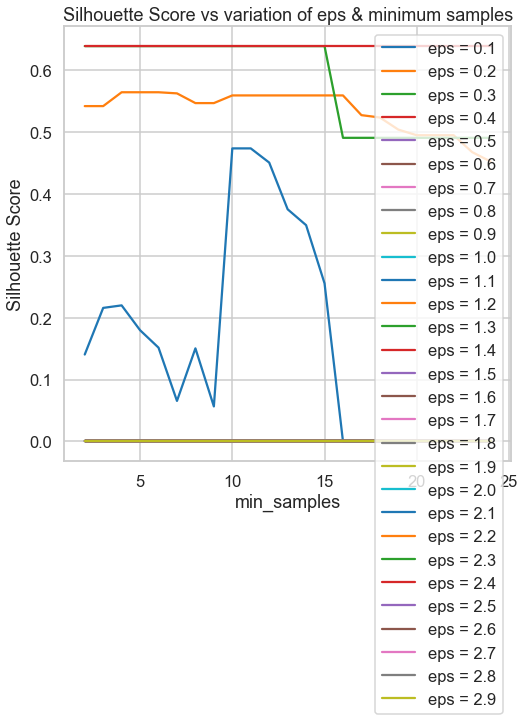

In [369]:
epsIRIS = np.arange (0.1, 3, 0.1)
min_samplesIRIS = range(2,25)
silhouette_scores_db_IRIS = np.zeros((len(epsIRIS), len(min_samplesIRIS))) #I'll first initialize silhouette score array
#with (eps x min_samples) size to store value of each variation of both values 

# will compute silhouette scores for different values of eps and min_samples
for i, e in enumerate(epsIRIS):
    for j, minsamples in enumerate(min_samplesIRIS):
        dbscanIRIS = DBSCAN(eps=e, min_samples=minsamples).fit(final_irisdf)
        labelsiris = dbscanIRIS.labels_
        if len(set(labelsiris)) > 1: #will calculate silhouette for only number of clusters>1
            silhouette_scores_db_IRIS[i,j] = silhouette_score(final_irisdf, labelsiris)

# Plot silhouette scores with variation of eps and min samples
plt.figure()
for i, e in enumerate(epsIRIS):
    plt.plot(min_samplesIRIS, silhouette_scores_db_IRIS[i,:], label='eps = {:.1f}'.format(e))
plt.title('Silhouette Score vs variation of eps & minimum samples')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

Will now choose best silhouette score to get best parameters and plot resulting clusters

In [370]:
best_idxIRIS = np.unravel_index(np.argmax(silhouette_scores_db_IRIS), silhouette_scores_db_IRIS.shape) #best score index 
best_epsIRIS = epsIRIS[best_idxIRIS[0]] #getting best eps value 
best_min_samplesIRIS = min_samplesIRIS[best_idxIRIS[1]] #getting best min_samples value 
best_scoreIRIS = silhouette_scores_db_IRIS[best_idxIRIS] #getting best score 

Will now perform dbscan clustering with the best chosen parameters

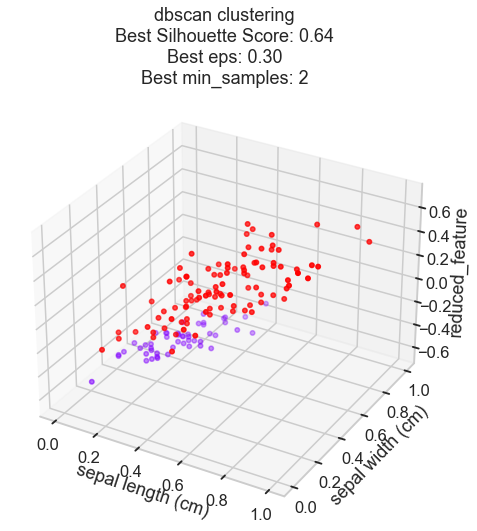

In [372]:
dbscaniris = DBSCAN(eps=best_epsIRIS, min_samples=best_min_samplesIRIS)
dbscan_labelsiris = dbscaniris.fit_predict(final_irisdf)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(final_irisdf['sepal length (cm)'],final_irisdf['sepal width (cm)'],final_irisdf['reduced_feature'], c=dbscan_labelsiris, cmap='rainbow')
ax2.set_xlabel('sepal length (cm)')
ax2.set_ylabel('sepal width (cm)')
ax2.set_zlabel('reduced_feature')
plt.title(f'dbscan clustering\nBest Silhouette Score: {best_scoreIRIS:.2f}\nBest eps: {best_epsIRIS:.2f}\nBest min_samples: {best_min_samplesIRIS}')
plt.show()

# ----------------------------------------------------------------------------------------------------------------

# Gaussian Mixture Iris Dataset

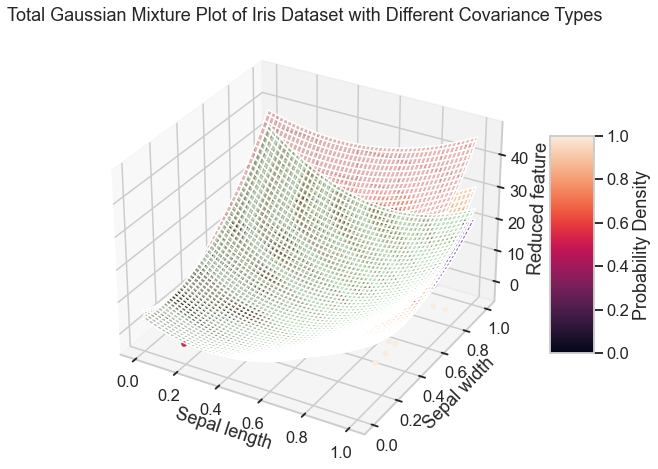

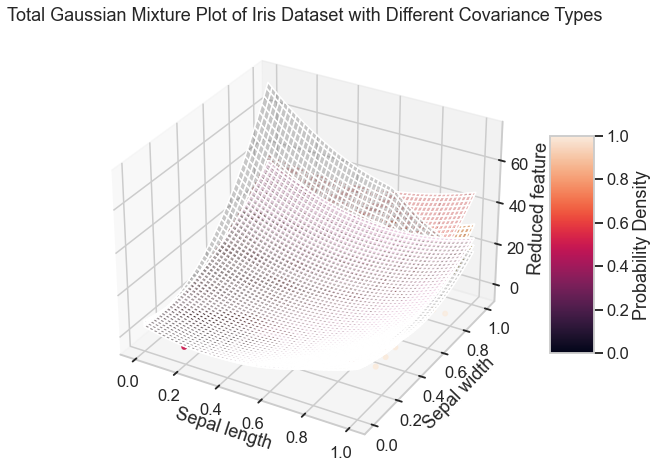

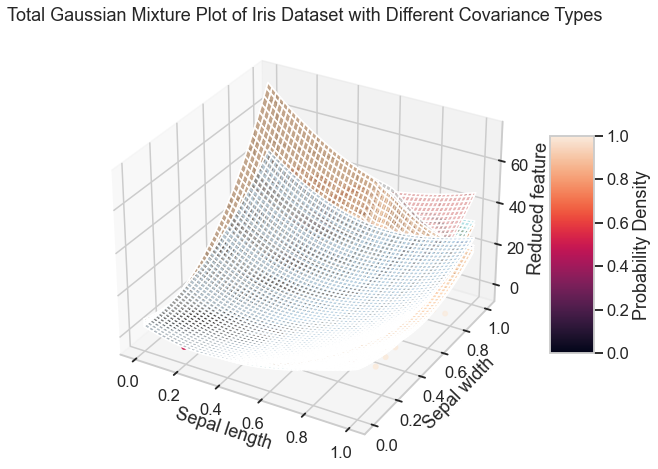

In [419]:
DifferrentClustersIris=[4,5,6]
models = []
covariancesiris = ['spherical', 'diag', 'tied', 'full']
for i  in DifferrentClustersIris:
#fitting GMM models with different covariance types
 for cov_type in covariancesiris:
    model = GaussianMixture(n_components=i, covariance_type=cov_type)
    model.fit(final_irisdf)
    models.append(model)

#plotting total Gaussian mixture plot with different covariance types
 
 fig = plt.figure(figsize=(10, 8))
 ax = fig.add_subplot(111, projection='3d')

 x = np.linspace(final_irisdf['sepal length (cm)'].min(), final_irisdf['sepal length (cm)'].max(), 150)
 y = np.linspace(final_irisdf['sepal width (cm)'].min(), final_irisdf['sepal width (cm)'].max(), 150)
 X_mesh, Y_mesh = np.meshgrid(x, y)
 Z_list = []
 for model in models:
    Z = -model.score_samples(np.column_stack([X_mesh.ravel(), Y_mesh.ravel(), np.zeros_like(X_mesh.ravel())]))
    Z = Z.reshape(X_mesh.shape)
    Z_list.append(Z)
    ax.plot_surface(X_mesh, Y_mesh, Z, alpha=0.3)

#plotting data points
 ax.scatter(final_irisdf['sepal length (cm)'], final_irisdf['sepal width (cm)'], final_irisdf['reduced_feature'], c=iris_data.target)

#setting plot title and labels
 ax.set_title('Total Gaussian Mixture Plot of Iris Dataset with Different Covariance Types')
 ax.set_xlabel('Sepal length')
 ax.set_ylabel('Sepal width')
 ax.set_zlabel('Reduced feature')

#adding colorbar legend
 cbar = plt.colorbar(ax.plot_surface(X_mesh, Y_mesh, Z_list[0]), shrink=0.5, aspect=5)
 cbar.set_label('Probability Density')

 plt.show()

# ----------------------------------------------------------------------------------------------------------------

## Customer dataset
Repeat all the above on the customer data set 

In [355]:
customer = pd.read_csv(r'C:\Users\DELL\Machine Learning\Customer data.csv')
customer

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0     100000001    0               0   67          2  124670           1   
1     100000002    1               1   22          1  150773           1   
2     100000003    0               0   49          1   89210           0   
3     100000004    0               0   45          1  171565           1   
4     100000005    0               0   53          1  149031           1   
...         ...  ...             ...  ...        ...     ...         ...   
1995  100001996    1               0   47          1  123525           0   
1996  100001997    1               1   27          1  117744           1   
1997  100001998    0               0   31          0   86400           0   
1998  100001999    1               1   24          1   97968           0   
1999  100002000    0               0   25          0   68416           0   

      Settlement size  
0                   2  
1                   2  
2                   0  
3                   1  
4                   1  
...               ...  
1995                0  
1996                0  
1997                0  
1998                0  
1999                0  

[2000 rows x 8 columns]

will start by examining dataset

In [422]:
customerfeatures=customer.iloc[:,1:] 
customerfeatures #selecting only important features, id is a unique feature to every customers so will not consider it in the dataset

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Marital status'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Occupation'}>],
       [<AxesSubplot:title={'center':'Settlement size'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

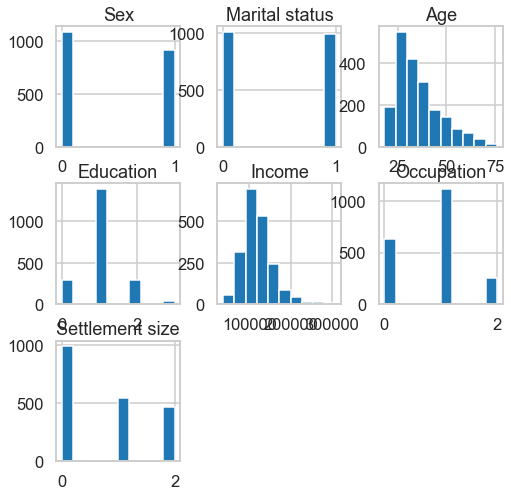

In [423]:
customerfeatures.hist()

Data needs to be normalized as it does not follow a normal distribution nor it falls in the range 0 -> 1

In [426]:
scaler = MinMaxScaler() 
customerNormalized = scaler.fit_transform(customerfeatures)
customerNorm = pd.DataFrame(customerNormalized, columns=customerfeatures.columns)
customerNorm

Sex  Marital status       Age  Education    Income  Occupation  \
0     0.0             0.0  0.844828   0.666667  0.324781         0.5   
1     1.0             1.0  0.068966   0.333333  0.420210         0.5   
2     0.0             0.0  0.534483   0.333333  0.195144         0.0   
3     0.0             0.0  0.465517   0.333333  0.496223         0.5   
4     0.0             0.0  0.603448   0.333333  0.413842         0.5   
...   ...             ...       ...        ...       ...         ...   
1995  1.0             0.0  0.500000   0.333333  0.320595         0.0   
1996  1.0             1.0  0.155172   0.333333  0.299460         0.5   
1997  0.0             0.0  0.224138   0.000000  0.184871         0.0   
1998  1.0             1.0  0.103448   0.333333  0.227162         0.0   
1999  0.0             0.0  0.120690   0.000000  0.119123         0.0   

      Settlement size  
0                 1.0  
1                 1.0  
2                 0.0  
3                 0.5  
4                 0.5  
...               ...  
1995              0.0  
1996              0.0  
1997              0.0  
1998              0.0  
1999              0.0  

[2000 rows x 7 columns]

will examine the correlation between features to see if there is a potential feature reduction


<AxesSubplot:>

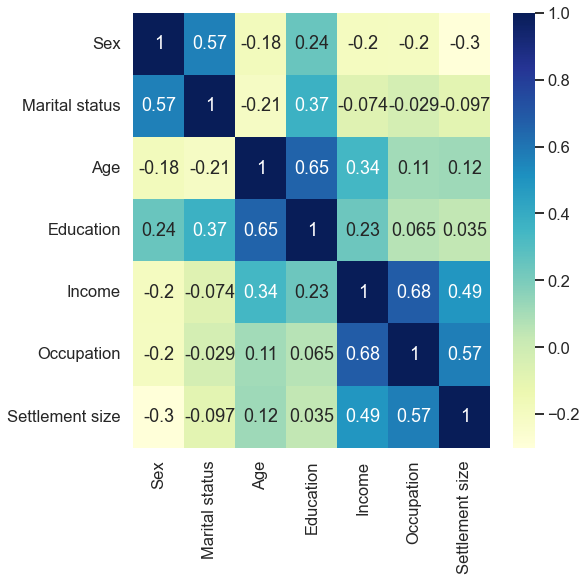

In [424]:
sns.heatmap(customerfeatures.corr(), cmap="YlGnBu", annot=True)

# ----------------------------------------------------------------------------------------------------------------

# Kmeans customer dataset